In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [4]:
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import KNNImputer , SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate , GridSearchCV ,StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [5]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].apply(lambda x : 1 if x == 'Yes' else 0)

In [6]:
for col in df.select_dtypes('object').columns :
    
    print(f'{col} -- {df[col].nunique()}')
    

person_gender -- 2
person_education -- 5
person_home_ownership -- 4
loan_intent -- 6


In [7]:
df.select_dtypes('object').isnull().mean()*100

person_gender            0.0
person_education         0.0
person_home_ownership    0.0
loan_intent              0.0
dtype: float64

In [8]:
df.select_dtypes('object').columns 

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent'],
      dtype='object')

In [9]:
df[df["person_age"]>70] 

person_age person_gender person_education  person_income  \
81          144.0          male         Bachelor       300616.0   
183         144.0          male        Associate       241424.0   
575         123.0        female      High School        97140.0   
747         123.0          male         Bachelor        94723.0   
32297       144.0        female        Associate      7200766.0   
32355        78.0          male        Associate        58463.0   
32381        73.0        female         Bachelor        51415.0   
32416        94.0          male      High School        29738.0   
32422        80.0          male      High School        77894.0   
32432        73.0          male         Bachelor        90678.0   
32506        84.0          male      High School       114705.0   
32521        73.0          male        Associate        47877.0   
32534        76.0        female         Bachelor        90934.0   
37930       116.0          male         Bachelor      5545545.0   
38113       109.0          male      High School      5556399.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
81                125                  RENT     4800.0     VENTURE   
183               121              MORTGAGE     6000.0   EDUCATION   
575               101                  RENT    20400.0   EDUCATION   
747               100                  RENT    20000.0     VENTURE   
32297             124              MORTGAGE     5000.0    PERSONAL   
32355              57                  RENT     3000.0     MEDICAL   
32381              47              MORTGAGE     5000.0    PERSONAL   
32416              76                  RENT     6500.0     MEDICAL   
32422              62                  RENT     6800.0     MEDICAL   
32432              47                  RENT     7800.0     MEDICAL   
32506              61              MORTGAGE    10000.0    PERSONAL   
32521              48                  RENT     1800.0     MEDICAL   
32534              58                  RENT    15000.0     MEDICAL   
37930              93              MORTGAGE     3823.0     VENTURE   
38113              85              MORTGAGE     6195.0     VENTURE   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
81             13.57                 0.02                         3.0   
183            11.86                 0.02                         2.0   
575            10.25                 0.21                         3.0   
747            11.01                 0.21                         4.0   
32297          12.73                 0.00                        25.0   
32355           7.51                 0.05                        25.0   
32381           7.49                 0.10                        28.0   
32416          11.01                 0.22                        27.0   
32422          11.71                 0.09                        25.0   
32432          11.01                 0.09                        24.0   
32506           7.51                 0.09                        24.0   
32521          12.53                 0.04                        21.0   
32534           8.94                 0.16                        25.0   
37930          12.15                 0.00                        24.0   
38113          12.58                 0.00                        22.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
81              789                               0            0  
183             807                               0            0  
575             805                               1            0  
747             714                               1            0  
32297           850                               0            0  
32355           754                               0            0  
32381           706                               0            0  
32416           773                               0            0  
32422           673                      

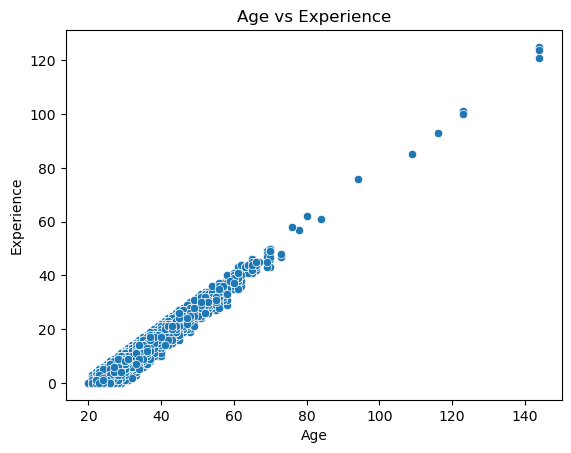

In [10]:
# Scatterplot to visualize the relationship
sns.scatterplot(x='person_age', y='person_emp_exp', data=df)
plt.title('Age vs Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.show()

In [11]:
# Drop rows where 'person_age' is greater than 70 and reset the index
df = df[df['person_age'] <= 70].reset_index(drop=True)
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44980        27.0          male        Associate        47971.0   
44981        37.0        female        Associate        65800.0   
44982        33.0          male        Associate        56942.0   
44983        29.0          male         Bachelor        33164.0   
44984        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44980               6                  RENT    15000.0            MEDICAL   
44981              17                  RENT     9000.0    HOMEIMPROVEMENT   
44982               7                  RENT     2771.0  DEBTCONSOLIDATION   
44983               4                  RENT    12000.0          EDUCATION   
44984               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44980          15.66                 0.31                         3.0   
44981          14.07                 0.14                        11.0   
44982          10.02                 0.05                        10.0   
44983          13.23                 0.36                         6.0   
44984          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44980           645                               0            1  
44981           621                               0            1  
44982           668                               0            1  
44983           604                               0            1  
44984           628                               0            1  

[44985 rows x 14 columns]

In [12]:
# Define threshold (e.g., 15 years)
threshold = 15

# Define condition for unreal experience
unreal_exp = df['person_emp_exp'] > (df['person_age'] - threshold)

# Replace unreal experience with realistic value
df.loc[unreal_exp, 'person_emp_exp'] = df['person_age'] - threshold


In [13]:
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44980        27.0          male        Associate        47971.0   
44981        37.0        female        Associate        65800.0   
44982        33.0          male        Associate        56942.0   
44983        29.0          male         Bachelor        33164.0   
44984        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44980               6                  RENT    15000.0            MEDICAL   
44981              17                  RENT     9000.0    HOMEIMPROVEMENT   
44982               7                  RENT     2771.0  DEBTCONSOLIDATION   
44983               4                  RENT    12000.0          EDUCATION   
44984               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44980          15.66                 0.31                         3.0   
44981          14.07                 0.14                        11.0   
44982          10.02                 0.05                        10.0   
44983          13.23                 0.36                         6.0   
44984          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44980           645                               0            1  
44981           621                               0            1  
44982           668                               0            1  
44983           604                               0            1  
44984           628                               0            1  

[44985 rows x 14 columns]

In [14]:
df['person_age'] = pd.to_numeric(df['person_age'], errors='coerce')

In [15]:
df['person_age'] = df['person_age'].astype(int)

In [16]:
df

person_age person_gender person_education  person_income  \
0              22        female           Master        71948.0   
1              21        female      High School        12282.0   
2              25        female      High School        12438.0   
3              23        female         Bachelor        79753.0   
4              24          male           Master        66135.0   
...           ...           ...              ...            ...   
44980          27          male        Associate        47971.0   
44981          37        female        Associate        65800.0   
44982          33          male        Associate        56942.0   
44983          29          male         Bachelor        33164.0   
44984          24          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44980               6                  RENT    15000.0            MEDICAL   
44981              17                  RENT     9000.0    HOMEIMPROVEMENT   
44982               7                  RENT     2771.0  DEBTCONSOLIDATION   
44983               4                  RENT    12000.0          EDUCATION   
44984               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44980          15.66                 0.31                         3.0   
44981          14.07                 0.14                        11.0   
44982          10.02                 0.05                        10.0   
44983          13.23                 0.36                         6.0   
44984          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44980           645                               0            1  
44981           621                               0            1  
44982           668                               0            1  
44983           604                               0            1  
44984           628                               0            1  

[44985 rows x 14 columns]

In [17]:
df["credit_score"].describe()

count    44985.000000
mean       632.569123
std         50.388810
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        784.000000
Name: credit_score, dtype: float64

In [18]:
df

person_age person_gender person_education  person_income  \
0              22        female           Master        71948.0   
1              21        female      High School        12282.0   
2              25        female      High School        12438.0   
3              23        female         Bachelor        79753.0   
4              24          male           Master        66135.0   
...           ...           ...              ...            ...   
44980          27          male        Associate        47971.0   
44981          37        female        Associate        65800.0   
44982          33          male        Associate        56942.0   
44983          29          male         Bachelor        33164.0   
44984          24          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44980               6                  RENT    15000.0            MEDICAL   
44981              17                  RENT     9000.0    HOMEIMPROVEMENT   
44982               7                  RENT     2771.0  DEBTCONSOLIDATION   
44983               4                  RENT    12000.0          EDUCATION   
44984               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44980          15.66                 0.31                         3.0   
44981          14.07                 0.14                        11.0   
44982          10.02                 0.05                        10.0   
44983          13.23                 0.36                         6.0   
44984          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               561                               0            1  
1               504                               1            0  
2               635                               0            1  
3               675                               0            1  
4               586                               0            1  
...             ...                             ...          ...  
44980           645                               0            1  
44981           621                               0            1  
44982           668                               0            1  
44983           604                               0            1  
44984           628                               0            1  

[44985 rows x 14 columns]

In [19]:
df["loan_status"].value_counts()

loan_status
0    34985
1    10000
Name: count, dtype: int64

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Features (X) and target (y)
X = df.drop('loan_status', axis=1)  # Drop the target column
y = df['loan_status']              # Target column

# Initialize undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine back into a DataFrame (optional)
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

In [22]:
# Define threshold (e.g., 15 years)
threshold = 15

# Define condition for unreal experience
unreal_exp = df_balanced['person_emp_exp'] > (df_balanced['person_age'] - threshold)

# Replace unreal experience with realistic value
df_balanced.loc[unreal_exp, 'person_emp_exp'] = df_balanced['person_age'] - threshold

In [32]:
# Drop rows where 'person_age' is greater than 70 and reset the index
df_balanced = df_balanced[df_balanced['person_age'] <= 70].reset_index(drop=True)
df_balanced

person_age person_gender person_education  person_income  \
0              23          male      High School        75393.0   
1              30          male           Master        60880.0   
2              22          male      High School        72654.0   
3              24        female         Bachelor        79020.0   
4              24        female      High School        72943.0   
...           ...           ...              ...            ...   
19995          27          male        Associate        47971.0   
19996          37        female        Associate        65800.0   
19997          33          male        Associate        56942.0   
19998          29          male         Bachelor        33164.0   
19999          24          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT     7000.0            MEDICAL   
1                   6                  RENT     3000.0    HOMEIMPROVEMENT   
2                   3              MORTGAGE     5200.0           PERSONAL   
3                   2              MORTGAGE    14000.0            VENTURE   
4                   3                  RENT     9000.0            VENTURE   
...               ...                   ...        ...                ...   
19995               6                  RENT    15000.0            MEDICAL   
19996              17                  RENT     9000.0    HOMEIMPROVEMENT   
19997               7                  RENT     2771.0  DEBTCONSOLIDATION   
19998               4                  RENT    12000.0          EDUCATION   
19999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              11.01                 0.09                         2.0   
1              13.10                 0.05                        10.0   
2               5.99                 0.07                         4.0   
3              15.31                 0.18                         4.0   
4              13.38                 0.12                         4.0   
...              ...                  ...                         ...   
19995          15.66                 0.31                         3.0   
19996          14.07                 0.14                        11.0   
19997          10.02                 0.05                        10.0   
19998          13.23                 0.36                         6.0   
19999          17.05                 0.13                         3.0   

       credit_score  previous_loan_defaults_on_file  loan_status  
0               575                               0            0  
1               733                               0            0  
2               659                               1            0  
3               534                               1            0  
4               644                               1            0  
...             ...                             ...          ...  
19995           645                               0            1  
19996           621                               0            1  
19997           668                               0            1  
19998           604                               0            1  
19999           628                               0            1  

[20000 rows x 14 columns]

In [49]:
df_balanced["loan_status"].value_counts()

loan_status
0    10000
1    10000
Name: count, dtype: int64

In [22]:
x = df_balanced.drop(['loan_status'], axis=1)  # Features
y = df_balanced['loan_status']     

In [23]:
num_column= x.select_dtypes(include= ['float','int']).columns
skewness_col = x[num_column].skew()
skewness_col

person_age                        1.918396
person_income                     8.453559
person_emp_exp                    1.970333
loan_amnt                         1.070648
loan_int_rate                     0.115738
loan_percent_income               0.779995
cb_person_cred_hist_length        1.710466
credit_score                     -0.603651
previous_loan_defaults_on_file    0.744889
dtype: float64

In [24]:
cat_ohe_pl = make_pipeline(OneHotEncoder(sparse_output=False , drop = 'first'))
cat_be_pl = make_pipeline(BinaryEncoder())
cat_preprocessing = ColumnTransformer(transformers=[
    ('cat_ohe_pl' , cat_ohe_pl , ['person_gender']),
    ('cat_be_pl' , cat_be_pl ,  ['person_education','person_home_ownership','loan_intent'])
] , remainder='passthrough')
cat_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_ohe_pl',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['person_gender']),
                                ('cat_be_pl',
                                 Pipeline(steps=[('binaryencoder',
                                                  BinaryEncoder())]),
                                 ['person_education', 'person_home_ownership',
                                  'loan_intent'])])

In [25]:
cat_preprocessing.fit_transform(x.select_dtypes('object'))

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [26]:
df.select_dtypes("number")

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0              22        71948.0               0    35000.0          16.02   
1              21        12282.0               0     1000.0          11.14   
2              25        12438.0               3     5500.0          12.87   
3              23        79753.0               0    35000.0          15.23   
4              24        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44980          27        47971.0               6    15000.0          15.66   
44981          37        65800.0              17     9000.0          14.07   
44982          33        56942.0               7     2771.0          10.02   
44983          29        33164.0               4    12000.0          13.23   
44984          24        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44980                 0.31                         3.0           645   
44981                 0.14                        11.0           621   
44982                 0.05                        10.0           668   
44983                 0.36                         6.0           604   
44984                 0.13                         3.0           628   

       previous_loan_defaults_on_file  loan_status  
0                                   0            1  
1                                   1            0  
2                                   0            1  
3                                   0            1  
4                                   0            1  
...                               ...          ...  
44980                               0            1  
44981                               0            1  
44982                               0            1  
44983                               0            1  
44984                               0            1  

[44985 rows x 10 columns]

In [27]:
num_log = make_pipeline(FunctionTransformer(np.log1p))
num_preprocessing = ColumnTransformer(transformers=[
    ('num_log' , num_log , ['person_income','loan_amnt'
                            ])],remainder='passthrough')

num_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_log',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>))]),
                                 ['person_income', 'loan_amnt'])])

In [28]:
num_preprocessing.fit_transform(x.select_dtypes('number'))

array([[ 11.23048298,   8.85380827,  23.        , ...,   2.        ,
        575.        ,   0.        ],
       [ 11.01667642,   8.00670085,  30.        , ...,  10.        ,
        733.        ,   0.        ],
       [ 11.19347749,   8.55660619,  22.        , ...,   4.        ,
        659.        ,   1.        ],
       ...,
       [ 10.94980605,   7.92732436,  33.        , ...,  10.        ,
        668.        ,   0.        ],
       [ 10.40925038,   9.39274526,  29.        , ...,   6.        ,
        604.        ,   0.        ],
       [ 10.85147073,   8.80477526,  24.        , ...,   3.        ,
        628.        ,   0.        ]])

In [29]:
preprocessing = ColumnTransformer(transformers=[
    
    ('cat_preprocessing' ,cat_preprocessing , ['person_gender','person_education','person_home_ownership','loan_intent']),
    
    ('num_preprocessing' , num_preprocessing , ['person_income','loan_amnt'])
    
] , remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('cat_ohe_pl',
                                                                  Pipeline(steps=[('onehotencoder',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 sparse_output=False))]),
                                                                  ['person_gender']),
                                                                 ('cat_be_pl',
                                                                  Pipeline(steps=[('binaryencoder',
                                                                                   BinaryEncoder())]),
                                                                  ['person_education',
                                                                   'person_home_ownership',
                                                                   'loan_intent'])]),
                                 ['person_gender', 'person_education',
                                  'person_home_ownership', 'loan_intent']),
                                ('num_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('num_log',
                                                                  Pipeline(steps=[('functiontransformer',
                                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                  ['person_income',
                                                                   'loan_amnt'])]),
                                 ['person_income', 'loan_amnt'])])

In [30]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

logisticregression
Train Avg f1 : 0.8862379390333794
Test Avg f1 : 0.8730019196190291
Train Avg Precision: 0.8524717853110182
Test Avg Precision: 0.8493409421761013
**************************************************
Confusion Matrix for logisticregression:


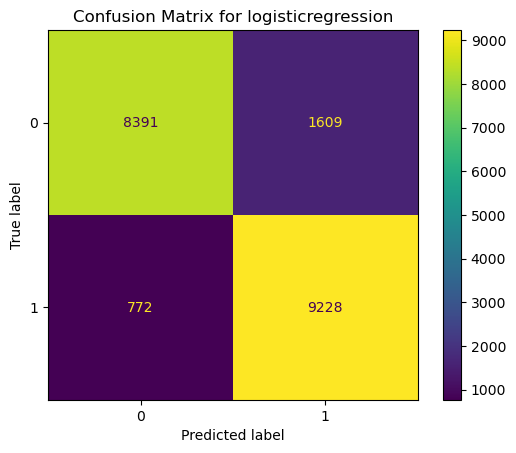

kneighborsclassifier
Train Avg f1 : 0.9126720467608095
Test Avg f1 : 0.8362043248492684
Train Avg Precision: 0.8881170143706537
Test Avg Precision: 0.83356438504086
**************************************************
Confusion Matrix for kneighborsclassifier:


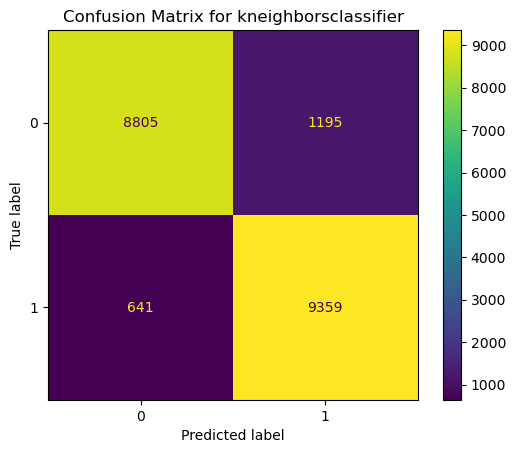

gaussiannb
Train Avg f1 : 0.8526473473860188
Test Avg f1 : 0.8398802004744358
Train Avg Precision: 0.7437255616636271
Test Avg Precision: 0.7382110287033112
**************************************************
Confusion Matrix for gaussiannb:


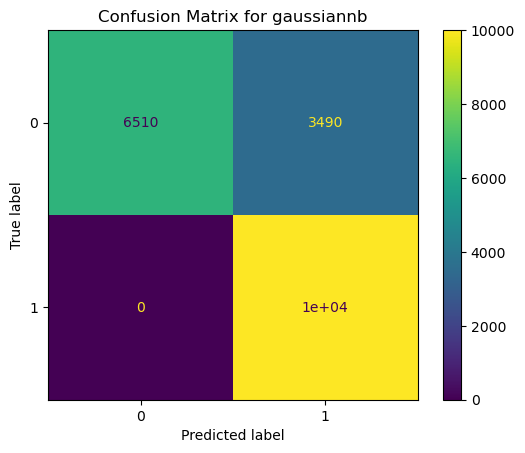

svc
Train Avg f1 : 0.9083306775819204
Test Avg f1 : 0.8651793491564412
Train Avg Precision: 0.8763019218913707
Test Avg Precision: 0.8563809306809705
**************************************************
Confusion Matrix for svc:


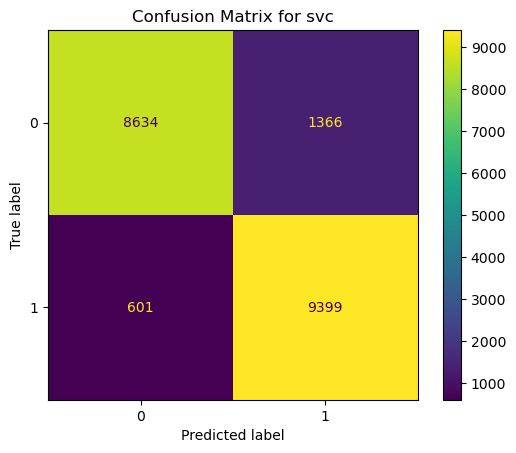

decisiontreeclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.8391588967836624
Train Avg Precision: 1.0
Test Avg Precision: 0.8566023613816791
**************************************************
Confusion Matrix for decisiontreeclassifier:


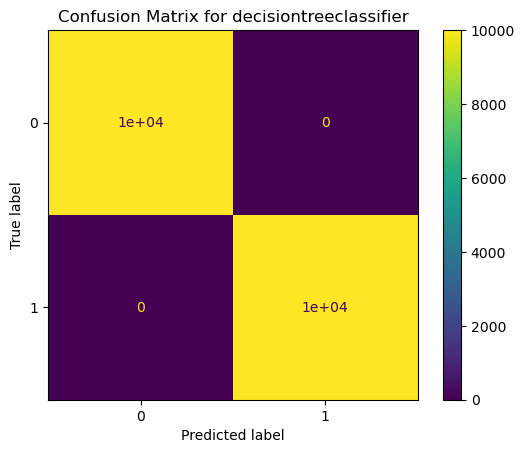

randomforestclassifier
Train Avg f1 : 0.9999875007812011
Test Avg f1 : 0.863453130338298
Train Avg Precision: 0.9999750031246094
Test Avg Precision: 0.8790676817091458
**************************************************
Confusion Matrix for randomforestclassifier:


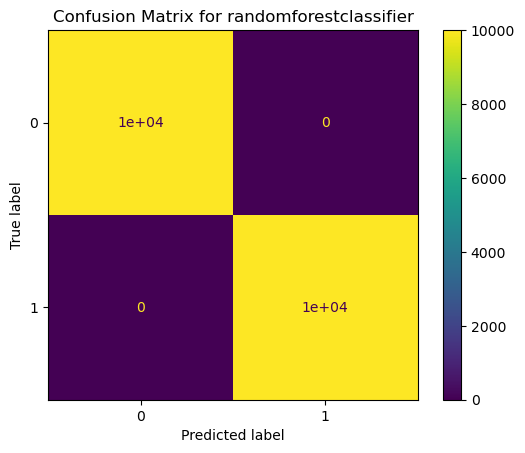

xgbclassifier
Train Avg f1 : 0.979109391203456
Test Avg f1 : 0.8775173889010265
Train Avg Precision: 0.9739995949029764
Test Avg Precision: 0.8946615447554196
**************************************************
Confusion Matrix for xgbclassifier:


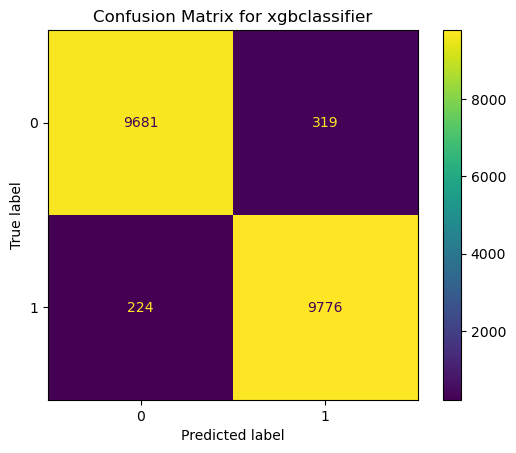

In [32]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}
for model in models :
    
    
    pl = make_pipeline(preprocessing ,SMOTE(), StandardScaler() , model)
    
    scores = cross_validate(estimator=pl , X = x  , y = y , cv=StratifiedKFold(n_splits=5) ,
                            scoring=scoring, return_train_score=True )
    
    print(pl.steps[-1][0])
    print(f"Train Avg f1 : {scores["train_f1"].mean()}")
    print(f"Test Avg f1 : {scores["test_f1"].mean()}")
    print(f"Train Avg Precision: {scores['train_precision'].mean()}")
    print(f"Test Avg Precision: {scores['test_precision'].mean()}")
    print('*'*50)
    # Make predictions on the entire dataset
    pl.fit(x, y)  # Fit the pipeline on the entire dataset
    y_pred = pl.predict(x)  # Predict using the fitted pipeline
    
    
    
    # Display the confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix for {pl.steps[-1][0]}:")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix for {pl.steps[-1][0]}")  # Title to identify the model
    plt.show()  # Display the confusion matrix plot

logisticregression
Train Avg F1: 0.8461824991109153
Test Avg F1: 0.8445451114745334
Train Avg Precision: 0.7708485292883192
Test Avg Precision: 0.7705430163207206
**************************************************
Confusion Matrix for logisticregression:


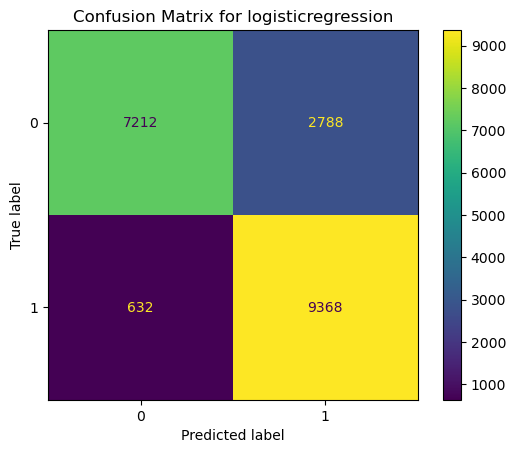

kneighborsclassifier
Train Avg F1: 0.5675448153665617
Test Avg F1: 0.5046821753212752
Train Avg Precision: 0.8967370243689249
Test Avg Precision: 0.8364546744373147
**************************************************
Confusion Matrix for kneighborsclassifier:


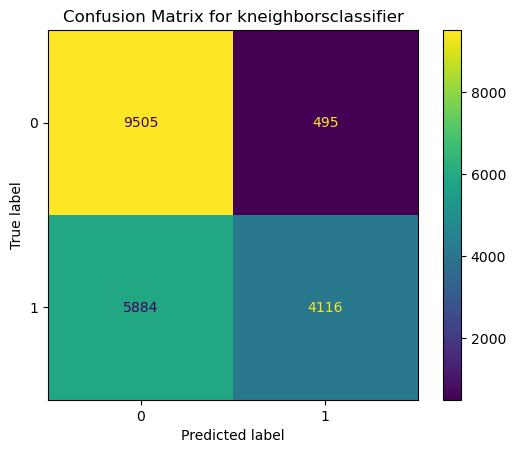

gaussiannb
Train Avg F1: 0.8514285251367326
Test Avg F1: 0.8514644448426951
Train Avg Precision: 0.7412961410565918
Test Avg Precision: 0.7413911708166536
**************************************************
Confusion Matrix for gaussiannb:


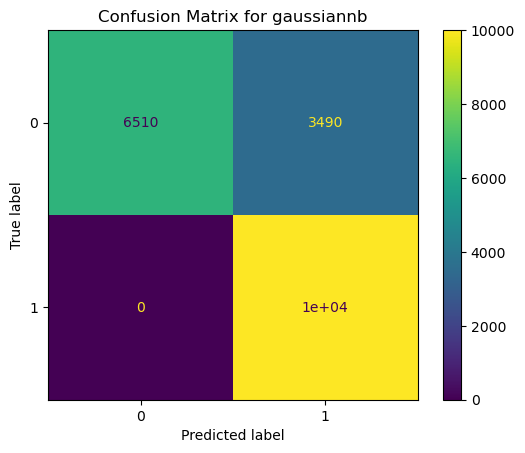

svc
Train Avg F1: 0.8516881804037558
Test Avg F1: 0.8512057701479726
Train Avg Precision: 0.751683833061507
Test Avg Precision: 0.7513272929115653
**************************************************
Confusion Matrix for svc:


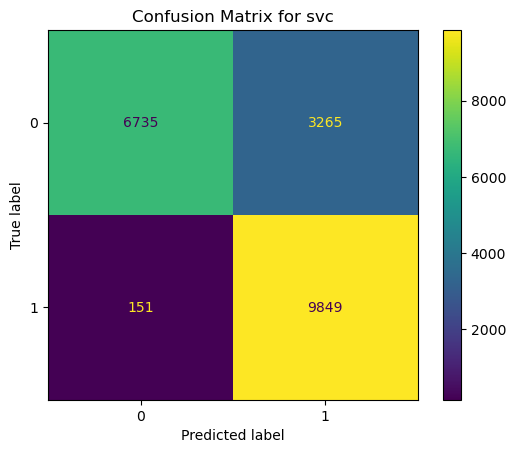

decisiontreeclassifier
Train Avg F1: 0.8602623476191431
Test Avg F1: 0.8152978605416754
Train Avg Precision: 0.7903549624874409
Test Avg Precision: 0.7628650800591885
**************************************************
Confusion Matrix for decisiontreeclassifier:


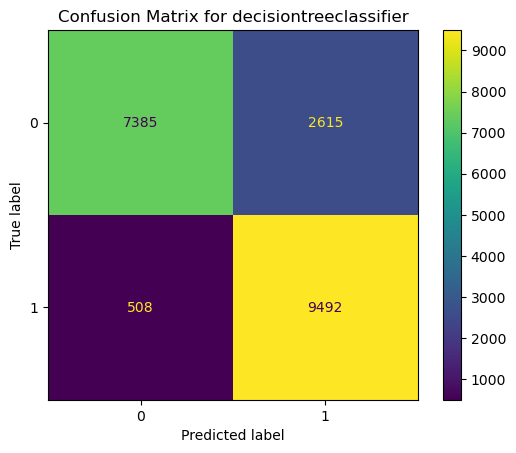

randomforestclassifier
Train Avg F1: 0.8616846933822252
Test Avg F1: 0.8238797388487029
Train Avg Precision: 0.785010606234249
Test Avg Precision: 0.7619613247775944
**************************************************
Confusion Matrix for randomforestclassifier:


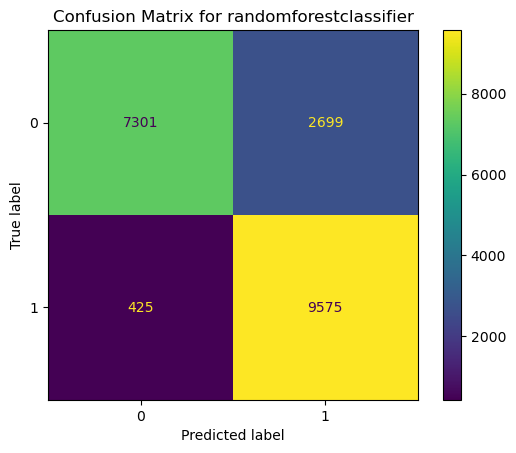

xgbclassifier
Train Avg F1: 0.853204756502404
Test Avg F1: 0.8434298852169592
Train Avg Precision: 0.7685925519501104
Test Avg Precision: 0.7639552653847255
**************************************************
Confusion Matrix for xgbclassifier:


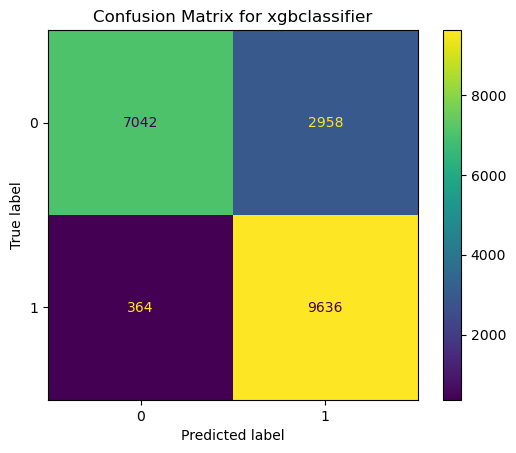

In [33]:
# Define custom scoring metrics
scoring = {
    'f1': 'f1',  # F1 Score
    'precision': 'precision'  # Precision Score
}

# Iterate over models
for model in models:
    # Create pipeline
    pl = make_pipeline(preprocessing,SMOTE(),StandardScaler(),
                       SelectFromModel(estimator=RandomForestClassifier(), max_features=2 ), model)
                      
    
    # Perform cross-validation
    scores = cross_validate(
        estimator=pl,
        X=x,
        y=y,
        cv=StratifiedKFold(n_splits=5),
        scoring=scoring,
        return_train_score=True
    )
    
    # Print results
    print(pl.steps[-1][0])  # Print model name
    print(f'Train Avg F1: {scores["train_f1"].mean()}')
    print(f'Test Avg F1: {scores["test_f1"].mean()}')
    print(f'Train Avg Precision: {scores["train_precision"].mean()}')
    print(f'Test Avg Precision: {scores["test_precision"].mean()}')
    print('*' * 50)
    pl.fit(x,y)
    y_pred = pl.predict(x)
    # Display the confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix for {pl.steps[-1][0]}:")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix for {pl.steps[-1][0]}")  # Title to identify the model
    plt.show()  # Display the confusion matrix plot


logisticregression
Train F1: 0.8768665678722568
Test F1: 0.8760388506714902
Precision: 0.8352097749121363
Test Precision: 0.8346330973567824
**************************************************


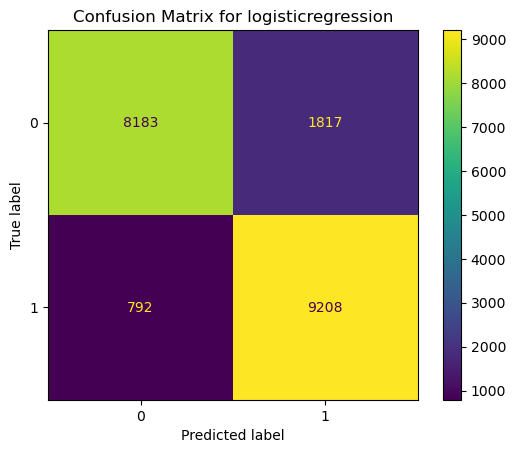

kneighborsclassifier
Train F1: 0.908524660423614
Test F1: 0.8684925885298881
Precision: 0.8853263655649372
Test Precision: 0.8482229012384952
**************************************************


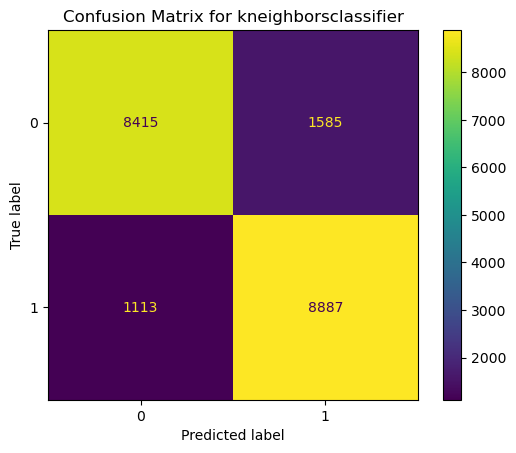

gaussiannb
Train F1: 0.8514285251367326
Test F1: 0.8514644448426951
Precision: 0.7412961410565918
Test Precision: 0.7413911708166536
**************************************************


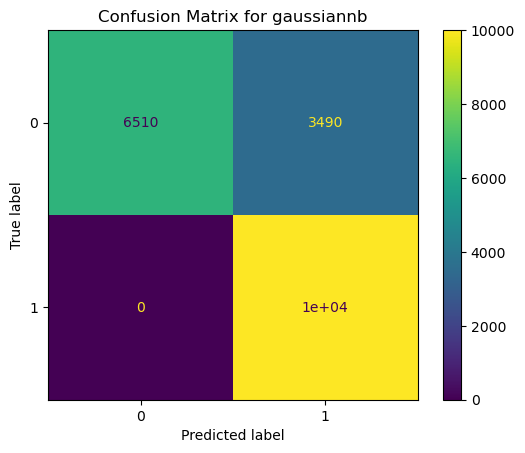

svc
Train F1: 0.8825418277810995
Test F1: 0.8798725491654767
Precision: 0.8402570329981659
Test Precision: 0.8388666109315507
**************************************************


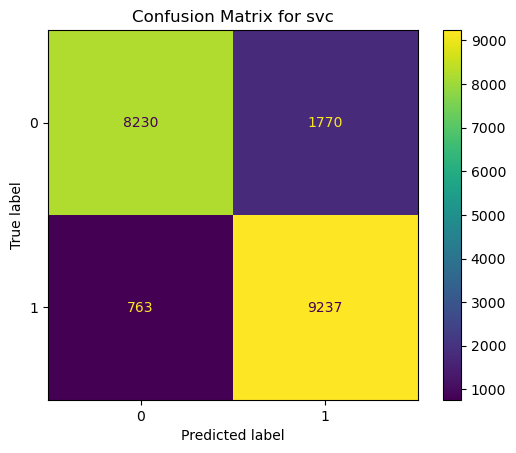

decisiontreeclassifier
Train F1: 1.0
Test F1: 0.8565147311715524
Precision: 1.0
Test Precision: 0.8577718536096335
**************************************************


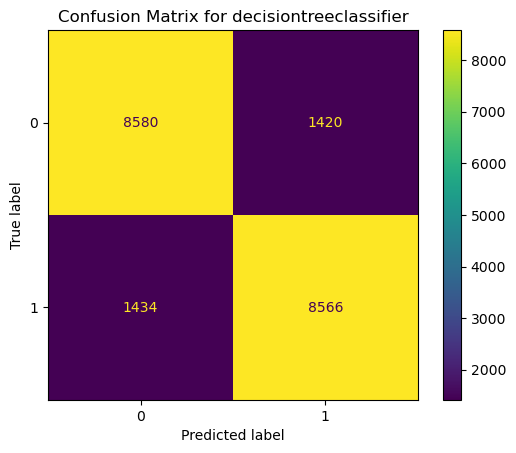

randomforestclassifier
Train F1: 0.9999875007812011
Test F1: 0.8867852737702806
Precision: 0.9999750031246094
Test Precision: 0.8744165231488463
**************************************************


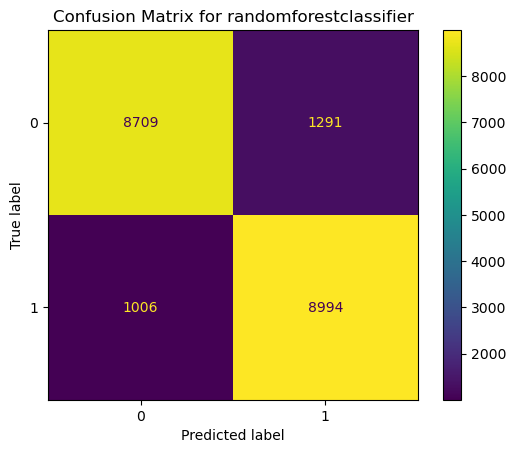

xgbclassifier
Train F1: 0.9393829308286744
Test F1: 0.8896416572134941
Precision: 0.9231995141343641
Test Precision: 0.8780775597899201
**************************************************


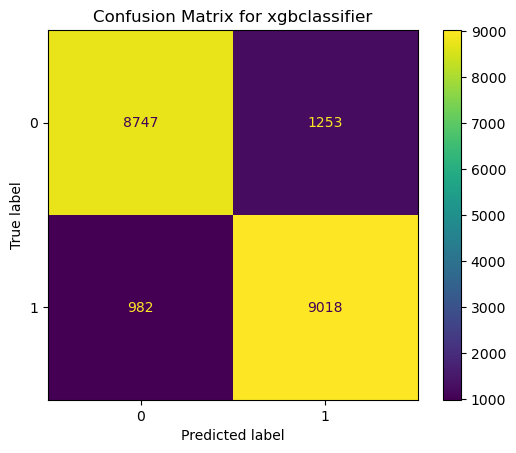

In [34]:
from sklearn.model_selection import cross_val_predict
# Define custom scoring metrics
scoring = {
    'f1': 'f1',  # F1 Score
    'precision': 'precision'  # Precision Score
}

# Iterate over models
for model in models:
    # Create pipeline
    pl = make_pipeline(preprocessing,StandardScaler(),
                       SelectFromModel(estimator=RandomForestClassifier(), max_features=5), model)
                      
    
    # Perform cross-validation
    scores = cross_validate(
        estimator=pl,
        X=x,
        y=y,
        cv=StratifiedKFold(n_splits=5),
        scoring=scoring,
        return_train_score=True
    )
    
    # Print results
    print(pl.steps[-1][0])  # Print model name
    print(f'Train F1: {scores["train_f1"].mean()}')
    print(f'Test F1: {scores["test_f1"].mean()}')
    print(f'Precision: {scores["train_precision"].mean()}')
    print(f'Test Precision: {scores["test_precision"].mean()}')
    print('*' * 50)
    # Display the confusion matrix
     # Generate confusion matrix for the model
    y_pred = cross_val_predict(
        estimator=pl,
        X=x,
        y=y,
        cv=StratifiedKFold(n_splits=5)
    )
    cm = confusion_matrix(y, y_pred)
    
    # Display the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix for {pl.steps[-1][0]}")
    plt.show()

## LR Tuning

## First trial

In [63]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Updated pipeline with LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    LogisticRegression(
        C=10,  # Regularization parameter
        max_iter=1000,  # Maximum iterations
        class_weight='balanced',  # Handle imbalanced classes
        solver='lbfgs',  # Optimizer
        penalty='l2'  # L2 regularization
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [64]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000))])

In [65]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.8861680513004593

In [66]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8725366104136004

In [67]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.8525573122669744

In [68]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8487339397833173

In [31]:
from sklearn.model_selection import cross_val_predict

In [70]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000))])

In [71]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [72]:
accuracy_score(y,y_pred)

0.86915

In [73]:
precision_score(y , y_pred)

0.848682346273732

In [74]:
f1_score(y , y_pred)

0.8728809442852286

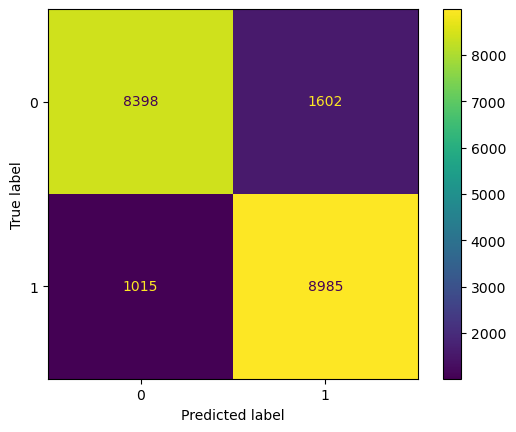

In [75]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [76]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Experiment with different parameters for LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    LogisticRegression(
        C=1,  # Try weaker regularization compared to 10
        max_iter=2000,  # Allow more iterations for convergence
        class_weight=None,  # Remove class balancing to see its effect
        solver='saga',  # Saga solver works well with large datasets
        penalty='l1'  # L1 regularization for sparsity in coefficients
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [77]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [78]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.886280611633936

In [79]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8728999698187009

In [80]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.8525512287441683

In [81]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8489735653663285

In [82]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [83]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [84]:
accuracy_score(y , y_pred)

0.8695

In [85]:
precision_score(y , y_pred)

0.8489140698772427

In [86]:
f1_score(y , y_pred)

0.8732394366197183

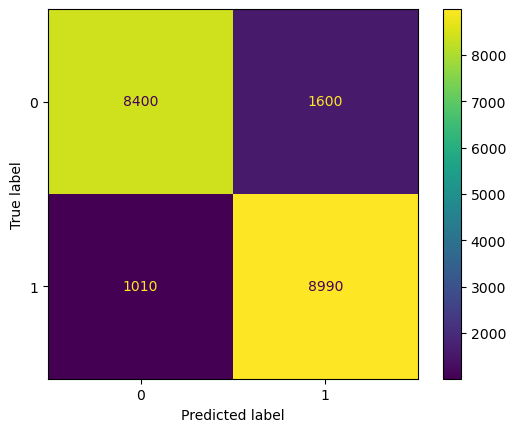

In [87]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial 

In [89]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Experiment with different parameters for LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=2),  # Apply Polynomial Features with degree=2
    SelectFromModel(LogisticRegression(C=0.1)),  # Apply SelectFromModel with LogisticRegression (C=0.1)
    LogisticRegression(C=0.1)  # Final LogisticRegression model with C=0.1
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [90]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [91]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.8957403360901525

In [92]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8730766830978137

In [93]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.8763843192492496

In [94]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8709437488714251

In [95]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [96]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [97]:
accuracy_score(y , y_pred)

0.87315

In [98]:
precision_score(y , y_pred)

0.8710350999303967

In [99]:
f1_score(y , y_pred)

0.8735104950889964

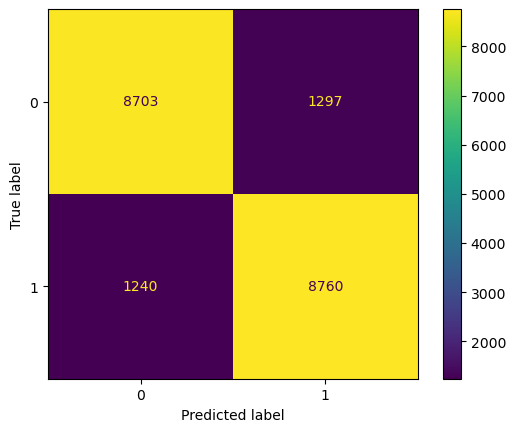

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [101]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Experiment with different parameters for LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=3),  # Apply Polynomial Features with degree=2
    SelectFromModel(LogisticRegression(C=0.1)),  # Apply SelectFromModel with LogisticRegression (C=0.1)
    LogisticRegression(C=0.1)  # Final LogisticRegression model with C=0.1
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [102]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [103]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.9089264718657482

In [104]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8616912568564341

In [106]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.8946436714998154

In [107]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8697909297836647

In [108]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [109]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))


In [110]:
accuracy_score( y , y_pred)

0.8634

In [111]:
precision_score( y , y_pred)

0.8699104234527687

In [112]:
f1_score( y , y_pred)

0.8621872477804681

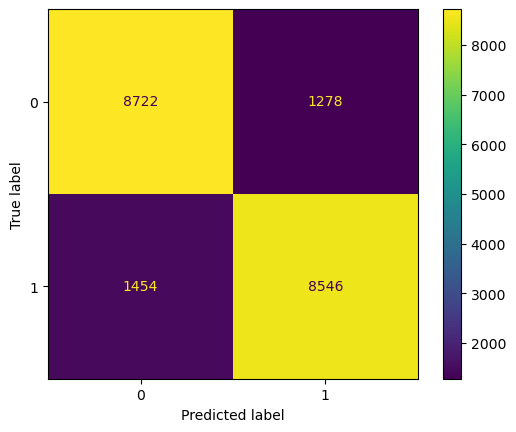

In [113]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Fifth Trial

In [114]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Experiment with different parameters for LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=4),  # Apply Polynomial Features with degree=2
    SelectFromModel(LogisticRegression(C=0.1)),  # Apply SelectFromModel with LogisticRegression (C=0.1)
    LogisticRegression(C=0.1)  # Final LogisticRegression model with C=0.1
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [115]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [116]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.9005269683767303

In [117]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8591338865968281

In [118]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.876960697466129

In [119]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8585499627087858

In [120]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [121]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [122]:
accuracy_score( y , y_pred)

0.8594

In [123]:
precision_score( y , y_pred)

0.8586110556775095

In [124]:
f1_score( y , y_pred)

0.859554490060933

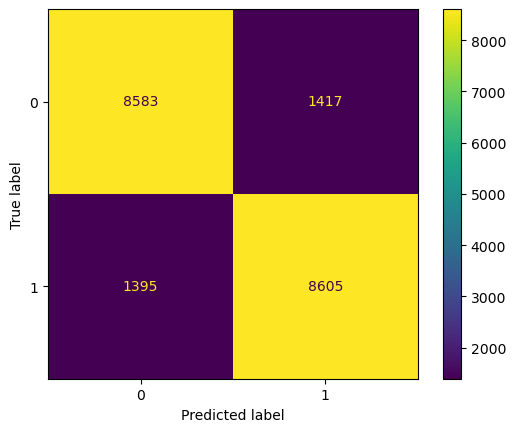

In [125]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Sixth Trial

In [126]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Experiment with different parameters for LogisticRegression
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=4),  # Apply Polynomial Features with degree=2
    SelectFromModel(LogisticRegression(C=0.1)),  # Apply SelectFromModel with LogisticRegression (C=0.1)
    LogisticRegression(C=0.5)  # Final LogisticRegression model with C=0.1
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [127]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.5))])

In [128]:
Train_f1 = scores['train_f1'].mean()
Train_f1 

0.9007785468615375

In [129]:
Test_f1 = scores['test_f1'].mean()
Test_f1 

0.8577146511557954

In [130]:
Train_precision = scores['train_precision'].mean()
Train_precision

0.8779453284541111

In [131]:
Test_precision = scores['test_precision'].mean()
Test_precision

0.8584733386003627

In [132]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1))),
                ('logisticregression', LogisticRegression(C=0.5))])

In [133]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [134]:
accuracy_score( y , y_pred)

0.85825

In [135]:
precision_score( y , y_pred)

0.8585727154438995

In [136]:
f1_score( y , y_pred)

0.8581861837827022

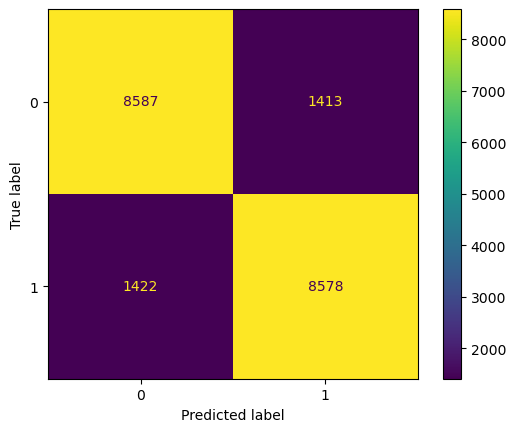

In [137]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Seventh Trial

In [138]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
# Pipeline with SelectFromModel and max_features
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=2),  # Polynomial features with degree 2
    SelectFromModel(estimator=LogisticRegression(C=0.1), max_features=2),  # Select top 2 features
    LogisticRegression(C=0.1)  # Final Logistic Regression
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [139]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1),
                                 max_features=2)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [141]:
scores['train_f1'].mean()

0.8514285251367326

In [142]:
scores['test_f1'].mean()

0.8514644448426951

In [143]:
scores['train_precision'].mean()

0.7412961410565918

In [144]:
scores['test_precision'].mean()

0.7413911708166536

In [145]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1),
                                 max_features=2)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [146]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [147]:
accuracy_score( y , y_pred)

0.8255

In [148]:
precision_score( y , y_pred)

0.7412898443291327

In [149]:
f1_score( y , y_pred)

0.8514261387824607

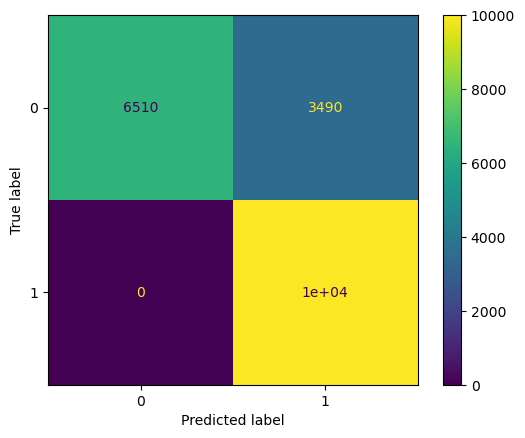

In [150]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Eighth Trial

In [151]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
# Pipeline with SelectFromModel and max_features
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    PolynomialFeatures(degree=2),  # Polynomial features with degree 2
    SelectFromModel(estimator=RandomForestClassifier(), max_features=2),  # Select top 2 features
    LogisticRegression(C=0.1)  # Final Logistic Regression
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [152]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 max_features=2)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [153]:
scores['train_f1'].mean()

0.8514285251367326

In [154]:
scores['test_f1'].mean()

0.8514644448426951

In [155]:
scores['train_precision'].mean()

0.7412961410565918

In [156]:
scores['test_precision'].mean()

0.7413911708166536

In [157]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 max_features=2)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [160]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [161]:
accuracy_score( y , y_pred)

0.8255

In [162]:
precision_score( y , y_pred)

0.7412898443291327

In [163]:
f1_score( y , y_pred)

0.8514261387824607

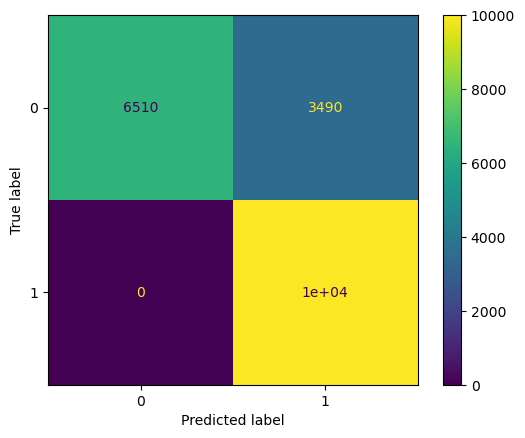

In [164]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## KNN

In [165]:
 # Create pipeline
pl = make_pipeline(preprocessing,StandardScaler(), SMOTE(),
                   SelectFromModel(estimator=RandomForestClassifier()),KNeighborsClassifier())
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('kneighborsclassifier', KNeighborsClassifier())])

## KNN Tuning

In [166]:
KNN_params =[
    {
    'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'kneighborsclassifier__p': [1, 2]  # Minkowski power parameter
}

]
srch = GridSearchCV(estimator= pl , param_grid=KNN_params ,
                    cv = StratifiedKFold(n_splits=5) ,scoring={'f1': 'f1',
                    'precision': 'precision'},refit='f1', return_train_score=True )

In [167]:
# Fit the model
srch.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_preprocessing',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('cat_ohe_pl',
                                                                                                          Pipeline(steps=[('onehotencoder',
                                                                                                                           OneHotEncoder(drop='first',
                                                                                                                                         sparse_output=False)...
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid=[{'kneighborsclassifier__metric': ['euclidean',
                                                           'manhattan',
                                                           'minkowski'],
                          'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9],
                          'kneighborsclassifier__p': [1, 2],
                          'kneighborsclassifier__weights': ['uniform',
                                                            'distance']}],
             refit='f1', return_train_score=True,
             scoring={'f1': 'f1', 'precision': 'precision'})

In [168]:
srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])

In [169]:
srch.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [170]:
srch.cv_results_['mean_train_f1'].mean()

0.9638633005498058

In [171]:
srch.cv_results_['mean_test_f1'].mean()

0.8680121774890243

In [172]:
srch.cv_results_['mean_train_precision'].mean()

0.9548903758170131

In [173]:
srch.cv_results_['mean_test_precision'].mean()

0.8515387570163964

In [174]:
srch.best_score_

0.8781127791643277

In [175]:
pl.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [176]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [177]:
accuracy_score(y , y_pred)

0.8651

In [178]:
f1_score(y , y_pred)

0.868210238374365

In [179]:
precision_score(y , y_pred)

0.8486440030557678

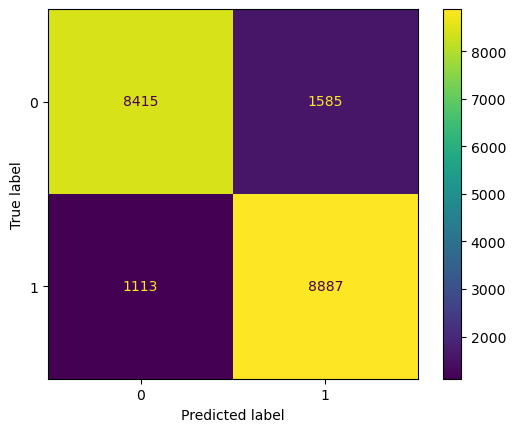

In [180]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## First Trial

In [181]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
     KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=9, 
        p=1, 
        weights='distance'  # Replaced with KNN classifier and specified parameters
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [182]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [183]:
scores['train_f1'].mean()

1.0

In [184]:
scores['test_f1'].mean()

0.8369347338228165

In [185]:
scores['train_precision'].mean()

1.0

In [186]:
scores['test_precision'].mean()

0.8333381850287471

In [187]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [188]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [189]:
accuracy_score(y , y_pred)

0.83675

In [190]:
f1_score(y,y_pred)

0.8375864298860867

In [191]:
precision_score(y,y_pred)

0.8333168365831931

In [192]:
cm =confusion_matrix(y, y_pred)

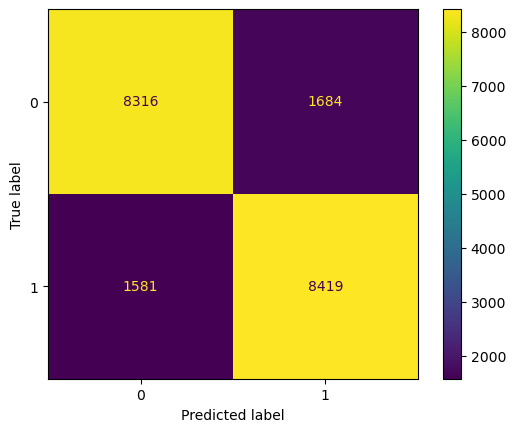

In [193]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Second Trial

In [194]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(), 
    SelectFromModel(estimator=LogisticRegression(C=0.1, solver='liblinear')),  # Logistic Regression for feature selection
    KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=9, 
        p=1, 
        weights='distance'  # Final classifier is KNN
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)


In [195]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [196]:
scores['train_f1'].mean()

0.9959022589768981

In [197]:
scores['test_f1'].mean()

0.8748690998044056

In [198]:
scores['train_precision'].mean()

0.9983921926569543

In [199]:
scores['test_precision'].mean()

0.8620357228996287

In [200]:
pl.fit(x , y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [202]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [203]:
accuracy_score( y , y_pred)

0.8731

In [204]:
precision_score( y , y_pred)

0.8620221230351252

In [205]:
f1_score( y , y_pred)

0.87501231163203

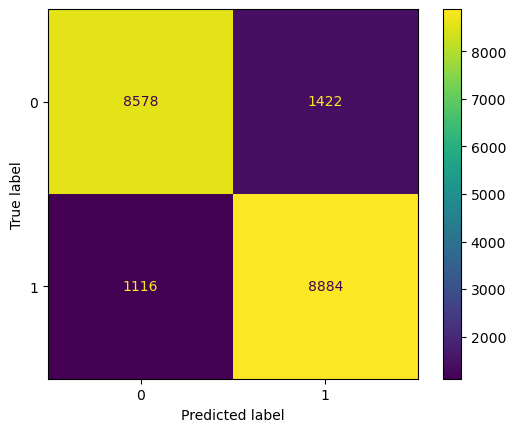

In [206]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial

In [207]:

custom_cv = StratifiedKFold(
    n_splits=10,  # Use 10 folds instead of 5
    shuffle=True,  # Shuffle the data before splitting
    random_state=42  # Ensure reproducibility
)
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),  
    SelectFromModel(estimator=LogisticRegression(C=0.1, solver='liblinear')),  # Logistic Regression for feature selection
    KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=9, 
        p=1, 
        weights='distance'  # Final classifier is KNN
    )
)


# Cross-validation with the custom StratifiedKFold
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=custom_cv,  # Use the customized StratifiedKFold
    scoring=scoring, 
    return_train_score=True
)

In [208]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [209]:
scores['train_f1'].mean()

0.9955046178239779

In [210]:
scores['test_f1'].mean()

0.8813322448132113

In [211]:
scores['train_precision'].mean()

0.9981791737895636

In [212]:
scores['test_precision'].mean()

0.861271945730661

In [213]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [214]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [215]:
accuracy_score(y,y_pred)

0.8731

In [216]:
f1_score(y, y_pred)

0.87501231163203

In [217]:
precision_score(y, y_pred)

0.8620221230351252

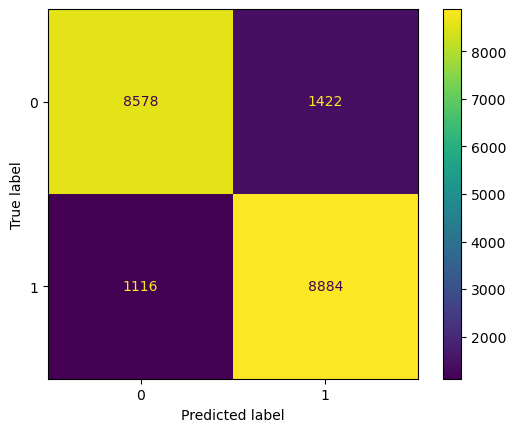

In [218]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [32]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Adjusted Pipeline
model = make_pipeline(preprocessing,
    StandardScaler(),
    SelectFromModel(estimator=LogisticRegression(C=0.1, solver='liblinear'), max_features=2),  # Regularized feature selection
    KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=15,  # Increase neighbors for smoother decision boundary
        weights='uniform'  # Use uniform weights to avoid overfitting to distances
    )
)

# Cross-validation
scores = cross_validate(
    estimator=model, 
    X=x, 
    y=y, 
    cv=cv, 
    scoring={
        'f1': 'f1',
        'precision': 'precision'
    }, 
    return_train_score=True
)


In [33]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'),
                                 max_features=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15))])

In [34]:
scores['train_f1'].mean()

0.3050641101356608

In [35]:
scores['test_f1'].mean()

0.3033913274290458

In [36]:
scores['train_precision'].mean()

0.9699971919357715

In [37]:
scores['test_precision'].mean()

0.9684752246206466

In [38]:
model.fit( x , y )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              solver='liblinear'),
                                 max_features=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15))])

In [39]:
y_pred = cross_val_predict(model , x, y, cv = StratifiedKFold(n_splits=5))

In [40]:
accuracy_score( y , y_pred)

0.5887

In [41]:
precision_score( y , y_pred)

0.9703075291622482

In [42]:
f1_score( y , y_pred)

0.30792529025744575

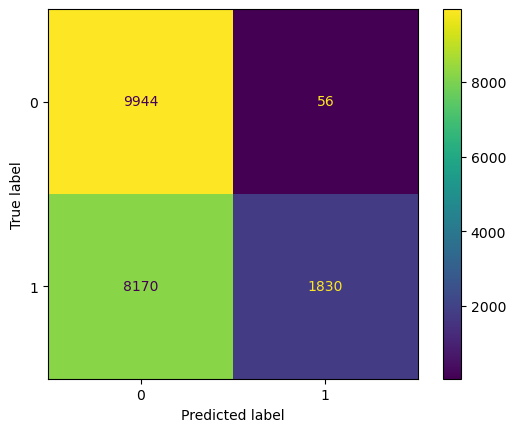

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Fifth Trial

In [233]:
custom_cv = StratifiedKFold(
    n_splits=7,  # Use 10 folds instead of 5
    shuffle=True,  # Shuffle the data before splitting
    random_state=42  # Ensure reproducibility
)
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SelectFromModel(estimator=LogisticRegression(C=0.5, solver='liblinear')),  # Logistic Regression for feature selection
    KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=3, 
        p=2, 
        weights='distance'  # Final classifier is KNN
    )
)


# Cross-validation with the custom StratifiedKFold
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=custom_cv,  # Use the customized StratifiedKFold
    scoring=scoring, 
    return_train_score=True
)

In [234]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.5,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [235]:
scores['train_f1'].mean()

0.9956030775822866

In [236]:
scores['test_f1'].mean()

0.8724174687788804

In [237]:
scores['train_precision'].mean()

0.9986922091857003

In [238]:
scores['test_precision'].mean()

0.8603397946348604

In [239]:
pl.fit( x , y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=0.5,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [240]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [241]:
accuracy_score( y , y_pred)

0.86495

In [242]:
precision_score( y , y_pred)

0.8588142758824108

In [243]:
f1_score( y , y_pred)

0.8660948887016013

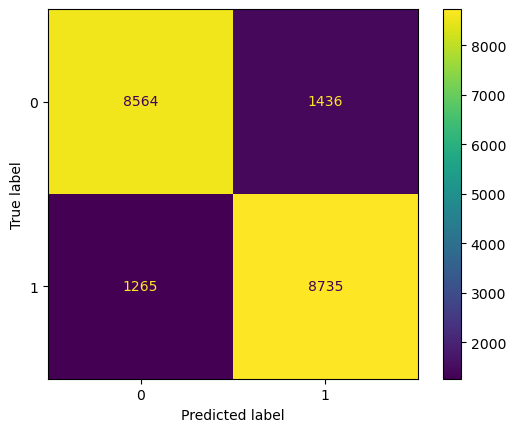

In [244]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Sixth Trial

In [245]:
custom_cv = StratifiedKFold(
    n_splits=8,  # Use 10 folds instead of 5
    shuffle=True,  # Shuffle the data before splitting
    random_state=42  # Ensure reproducibility
)
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),  
    SelectFromModel(estimator=LogisticRegression(C=1, solver='liblinear')),  # Logistic Regression for feature selection
    KNeighborsClassifier(
        metric='manhattan', 
        n_neighbors=9, 
        p=1, 
        weights='distance'  # Final classifier is KNN
    )
)


# Cross-validation with the custom StratifiedKFold
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=custom_cv,  # Use the customized StratifiedKFold
    scoring=scoring, 
    return_train_score=True
)

In [246]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [247]:
scores['train_f1'].mean()

0.9955666009835944

In [248]:
scores['test_f1'].mean()

0.8805257763278009

In [249]:
scores['train_precision'].mean()

0.9982622693386761

In [250]:
scores['test_precision'].mean()

0.8599905210152685

In [251]:
pl.fit( x , y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(C=1,
                                                              solver='liblinear'))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1,
                                      weights='distance'))])

In [252]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [253]:
accuracy_score( y , y_pred)

0.8731

In [254]:
precision_score( y , y_pred)

0.8620221230351252

In [255]:
f1_score( y , y_pred)

0.87501231163203

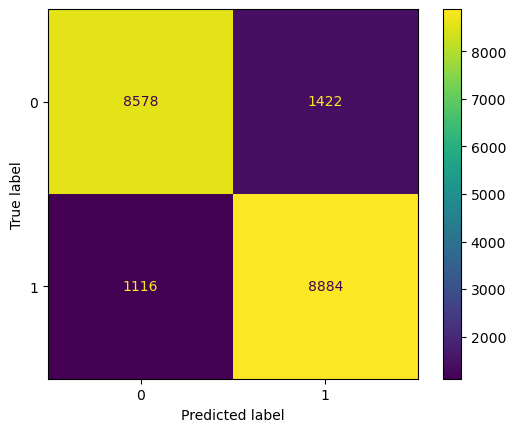

In [256]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## SVC Tuning
## First Trial

In [257]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline with SVM 
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    SVC(
        kernel='linear',  # You can change this to 'rbf', 'poly', etc.
        C=1.0,  # Regularization parameter
        gamma='scale',  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
        class_weight='balanced'  # Adjust weights for class imbalance
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)


In [258]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

In [259]:
scores['train_f1'].mean()

0.887669734390456

In [260]:
scores['test_f1'].mean()

0.8729604124717405

In [261]:
scores['train_precision'].mean()

0.8514899235864533

In [262]:
scores['test_precision'].mean()

0.8469349617369677

In [263]:
pl.fit ( x , y )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

In [264]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [265]:
accuracy_score( y , y_pred)

0.8692

In [266]:
precision_score( y , y_pred)

0.8468620819240887

In [267]:
f1_score( y , y_pred)

0.8732803720209262

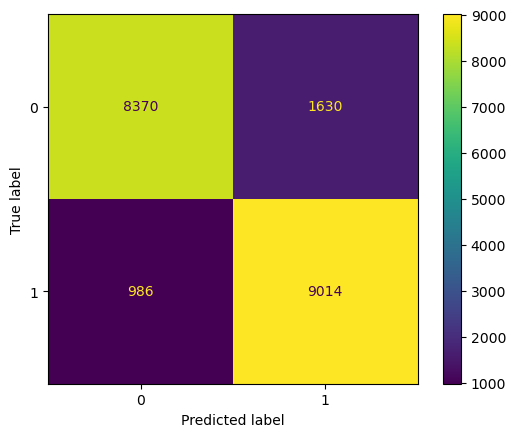

In [268]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [269]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    SVC(
    kernel='poly',         # Use 'poly' kernel
    C=1.0,                 # Regularization parameter
    gamma='scale',         # Kernel coefficient (used for poly/rbf kernels)
    coef0=1.0,             # Influence of higher-order terms in polynomial kernel
    class_weight='balanced',  # Handle class imbalance
    shrinking=True         # Enable shrinking heuristic for faster convergence
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)


In [270]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc',
                 SVC(class_weight='balanced', coef0=1.0, kernel='poly'))])

In [271]:
scores['train_f1'].mean()

0.9086068339614947

In [272]:
scores['test_f1'].mean()

0.865583025877972

In [273]:
scores['train_precision'].mean()

0.8818320128100814

In [274]:
scores['test_precision'].mean()

0.8610598471286585

In [275]:
pl.fit(x , y )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc',
                 SVC(class_weight='balanced', coef0=1.0, kernel='poly'))])

In [276]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [277]:
accuracy_score( y , y_pred)

0.8653

In [278]:
precision_score( y , y_pred)

0.8612539556962026

In [279]:
f1_score( y , y_pred)

0.8660501193317423

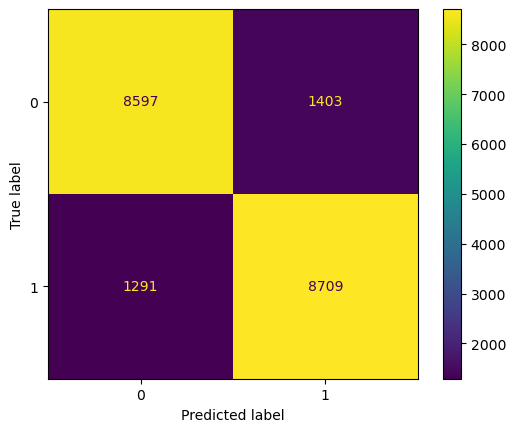

In [280]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial

In [282]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline with SVM instead of KNN
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SVC(
    kernel='rbf',         # Use 'rbf' kernel
    C=1.0,                # Regularization parameter
    gamma='scale',        # Kernel coefficient
    coef0=1.0,            # Influence of higher-order terms in polynomial kernel
    class_weight='balanced',  # Handle class imbalance
    shrinking=True,       # Enable shrinking heuristic for faster convergence
    tol=1e-4              # Tolerance for stopping criteria, smaller for more precision
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)


In [283]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'person_home_ownership',
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', coef0=1.0, tol=0.0001))])

In [284]:
scores['train_f1'].mean()

0.9083766711020159

In [285]:
scores['test_f1'].mean()

0.8651364422716874

In [286]:
scores['train_precision'].mean()

0.8763658569931307

In [287]:
scores['test_precision'].mean()

0.8562944453474206

In [289]:
pl.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'person_home_ownership',
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', coef0=1.0, tol=0.0001))])

In [290]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [291]:
accuracy_score( y , y_pred)

0.8642

In [292]:
precision_score(y , y_pred)

0.8565694145290778

In [293]:
f1_score( y ,y_pred)

0.8656376768576234

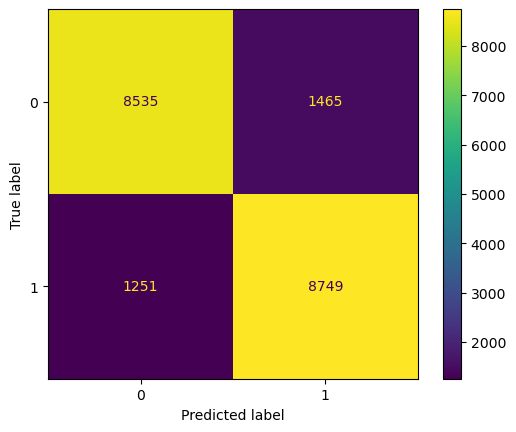

In [294]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [295]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline with SVM instead of KNN
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SVC(
    kernel='poly',         # Use 'poly' kernel for polynomial decision boundary
    C=1.0,                 # Regularization parameter
    degree=3,              # Degree of the polynomial kernel (start with 3)
    gamma='scale',         # Gamma parameter for scaling (default)
    coef0=1.0,             # Influence of higher-order terms (start with 1.0)
    class_weight='balanced',  # Handle class imbalance
    shrinking=True,        # Enable shrinking heuristic for faster convergence
    tol=1e-3               # Tolerance for stopping criteria
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)


In [296]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', coef0=1.0, kernel='poly'))])

In [297]:
scores['train_f1'].mean()

0.9086068339614947

In [298]:
scores['test_f1'].mean()

0.865583025877972

In [299]:
scores['train_precision'].mean()

0.8818320128100814

In [300]:
scores['test_precision'].mean()

0.8610598471286585

In [301]:
pl.fit( x , y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', coef0=1.0, kernel='poly'))])

In [302]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [303]:
accuracy_score(y , y_pred)

0.8653

In [304]:
precision_score( y , y_pred)

0.8612539556962026

In [305]:
f1_score(y , y_pred)

0.8660501193317423

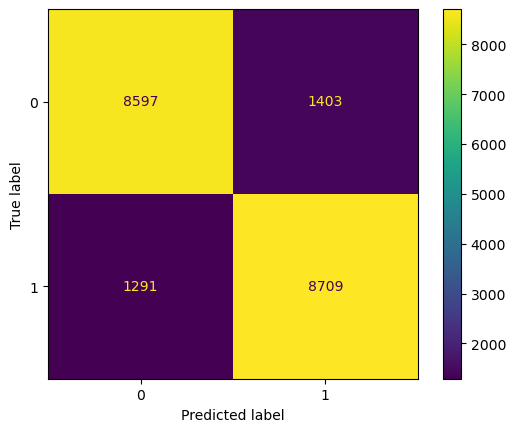

In [306]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Fifth Trial

In [307]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Create the pipeline with SVM instead of KNN
pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    SVC(
    kernel='sigmoid',        # Use 'sigmoid' kernel
    C=1.0,                   # Regularization parameter
    gamma='scale',           # Gamma parameter for scaling (default)
    coef0=1.0,               # Influence of the constant in the sigmoid function
    class_weight='balanced', # Handle class imbalance
    shrinking=True,          # Enable shrinking heuristic for faster convergence
    tol=1e-3                 # Tolerance for stopping criteria
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [308]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('svc',
                 SVC(class_weight='balanced', coef0=1.0, kernel='sigmoid'))])

In [309]:
scores['train_f1'].mean()

0.7532031039472724

In [310]:
scores['test_f1'].mean()

0.7487545775351971

In [311]:
scores['train_precision'].mean()

0.7533323906152701

In [312]:
scores['test_precision'].mean()

0.7506234165649386

## Sixth Trial

In [313]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SVC(
    kernel='sigmoid',        # Use 'sigmoid' kernel
    C=1.0,                   # Regularization parameter
    gamma='scale',           # Gamma parameter for scaling (default)
    coef0=10,                # Influence of the constant in the sigmoid function (set to 10)
    class_weight='balanced', # Handle class imbalance
    shrinking=True,          # Enable shrinking heuristic for faster convergence
    tol=1e-3                 # Tolerance for stopping criteria
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [314]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                   'loan_intent']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', coef0=10, kernel='sigmoid'))])

In [315]:
scores['train_f1'].mean()

0.7413554525899311

In [316]:
scores['test_f1'].mean()

0.7262998238319812

In [317]:
scores['train_precision'].mean()

0.6822027303965126

In [318]:
scores['test_precision'].mean()

0.6807976637403564

## Random_Forest Classifier
## First Trail

In [36]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    RandomForestClassifier(
        n_estimators=100,  
        criterion='gini', 
        max_depth=None,     
        min_samples_split=2,  
        min_samples_leaf=1,  
        max_features='sqrt',  
        class_weight='balanced',  
        bootstrap=True,        
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [37]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [38]:
scores['train_f1'].mean()

0.9999875007812011

In [39]:
scores['test_f1'].mean()

0.7911695565155435

In [40]:
scores['train_precision'].mean()

0.9999750031246094

In [41]:
scores['test_precision'].mean()

0.8760053406564628

In [42]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [45]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [46]:
accuracy_score(y , y_pred)

0.8115

In [47]:
f1_score(y , y_pred)

0.7938087945744914

In [48]:
precision_score( y , y_pred)

0.8760260743602124

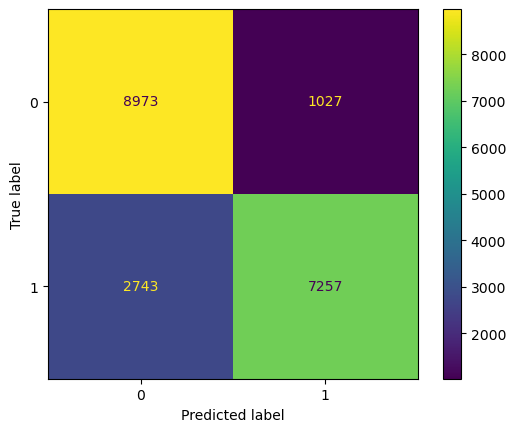

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second trial

In [50]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    RandomForestClassifier(
    n_estimators=200,          # Number of trees in the forest
    criterion='gini',          # Split criterion
    max_depth=10,              # Maximum depth of trees
    min_samples_split=2,       # Minimum samples required to split an internal node
    min_samples_leaf=1,        # Minimum samples required to be a leaf node
    max_features='sqrt',       # Number of features to consider at each split
    class_weight='balanced',   # Handle imbalanced classes
    bootstrap=True,            # Whether to use bootstrap samples
    random_state=42            # Random state for reproducibility
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [51]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=200, random_state=42))])

In [52]:
scores['train_f1'].mean()

0.8635047239213117

In [53]:
scores['test_f1'].mean()

0.7881695596099872

In [54]:
scores['train_precision'].mean()

0.9341653078749411

In [55]:
scores['test_precision'].mean()

0.8822607221170863

In [56]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=200, random_state=42))])

In [58]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [59]:
accuracy_score( y , y_pred)

0.80895

In [60]:
precision_score( y , y_pred)

0.8823165449820567

In [61]:
f1_score( y , y_pred)

0.7886731928543775

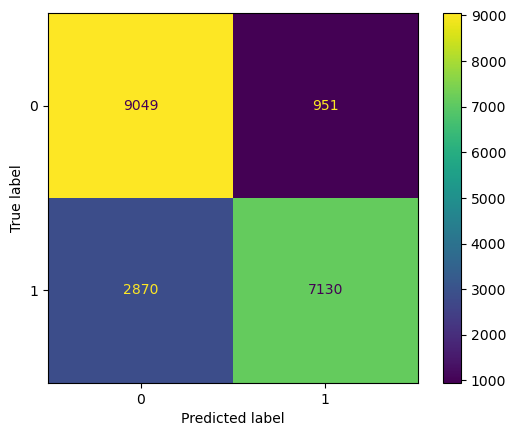

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial

In [63]:
# Scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    RandomForestClassifier(
    n_estimators=300,          # Number of trees in the forest (300 for better generalization)
    criterion='gini',          # Split criterion (Gini index)
    max_depth=20,              # Maximum depth of trees (set to 20 as requested)
    min_samples_split=10,      # Minimum samples required to split an internal node (higher to prevent overfitting)
    min_samples_leaf=4,        # Minimum samples required to be a leaf node (4 to reduce overfitting)
    max_features='sqrt',       # Number of features to consider for each split (sqrt is common)
    class_weight='balanced',   # Handle class imbalance (balanced to adjust for class imbalance)
    bootstrap=True,            # Whether to use bootstrap samples (default is True)
    random_state=42            # Random state for reproducibility
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [64]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [65]:
scores['train_f1'].mean()

0.9196335061357358

In [66]:
scores['test_f1'].mean()

0.7921030488027216

In [67]:
scores['train_precision'].mean()

0.9550322427530056

In [68]:
scores['test_precision'].mean()

0.877380151154145

In [69]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [71]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [72]:
accuracy_score( y , y_pred)

0.8109

In [73]:
precision_score( y , y_pred)

0.8773974265598447

In [74]:
f1_score(y , y_pred)

0.7926307709178638

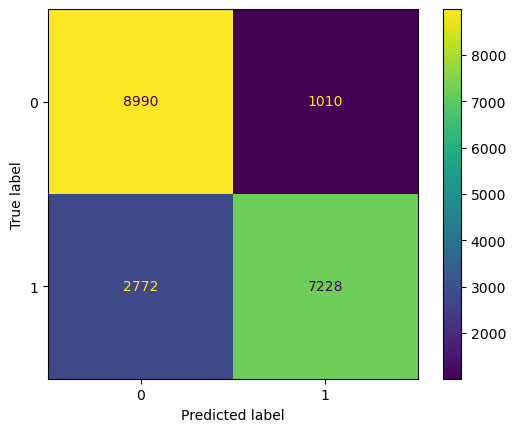

In [75]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [76]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    RandomForestClassifier(
    n_estimators=300,          # Number of trees in the forest
    criterion='gini',          # Split criterion (Gini index)
    max_depth=30,              # Maximum depth of trees (set to 30)
    min_samples_split=10,      # Minimum samples required to split an internal node (helps avoid overfitting)
    min_samples_leaf=5,        # Minimum samples required to be a leaf node (reduces overfitting)
    max_features='sqrt',       # Number of features to consider for each split (sqrt is common)
    class_weight='balanced',   # Handle class imbalance (adjusts for imbalanced classes)
    bootstrap=True,            # Whether to use bootstrap samples (default is True)
    random_state=42            # Random state for reproducibility
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [77]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [78]:
scores['train_f1'].mean()

0.9097378634548287

In [79]:
scores['test_f1'].mean()

0.792595725935341

In [80]:
scores['train_precision'].mean()

0.9483572585432632

In [81]:
scores['test_precision'].mean()

0.8765347870275564

In [82]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [87]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [88]:
accuracy_score(y , y_pred)

0.8111

In [89]:
f1_score(y , y_pred)

0.7930996714129245

In [90]:
precision_score(y , y_pred)

0.876634382566586

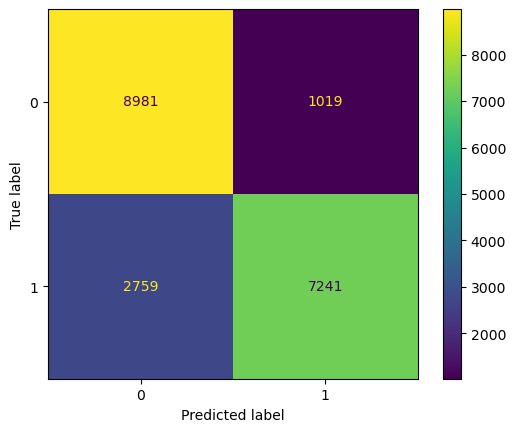

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Fifth Trial

In [92]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    RandomForestClassifier(
    n_estimators=300,          # Number of trees in the forest (good number for deeper trees)
    criterion='gini',          # Split criterion (Gini index is default and effective)
    max_depth=30,              # Maximum depth of trees
    min_samples_split=10,      # Minimum samples required to split an internal node (prevents overfitting)
    min_samples_leaf=5,        # Minimum samples required to be a leaf node (prevents overfitting)
    max_features='log2',       # Use logarithmic number of features per split (log2 of total features)
    class_weight='balanced',   # Handle class imbalance (helps minority classes)
    bootstrap=True,            # Use bootstrapping (sampling with replacement for training trees)
    random_state=42            # Ensure reproducibility of results
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [93]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        max_features='log2', min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [94]:
scores['train_f1'].mean()

0.9097378634548287

In [95]:
scores['test_f1'].mean()

0.792595725935341

In [96]:
scores['train_precision'].mean()

0.9483572585432632

In [97]:
scores['test_precision'].mean()

0.8765347870275564

In [98]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        max_features='log2', min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [99]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [100]:
accuracy_score(y,y_pred)

0.8111

In [101]:
precision_score(y,y_pred)

0.876634382566586

In [102]:
f1_score(y , y_pred)

0.7930996714129245

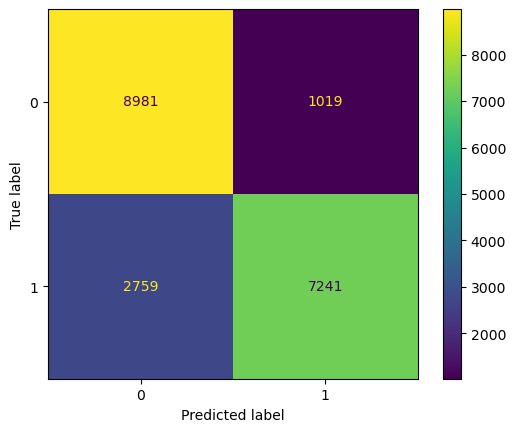

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Sixth Trial

In [104]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    RandomForestClassifier(
    n_estimators=300,          # Number of trees in the forest
    criterion='entropy',       # Using entropy for split criterion (information gain)
    max_depth=30,              # Maximum depth of trees
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=2,        # Minimum samples required to be a leaf node
    max_features='log2',       # Logarithmic number of features for each split
    class_weight='balanced',   # Handle class imbalance
    bootstrap=True,            # Use bootstrapping (sampling with replacement)
    random_state=42            # Random state for reproducibility
)
)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [105]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        max_features='log2', min_samples_leaf=2,
                                        n_estimators=300, random_state=42))])

In [106]:
scores['train_f1'].mean()

0.9902327987419006

In [107]:
scores['test_f1'].mean()

0.7937469324744306

In [108]:
scores['train_precision'].mean()

0.9945281826581585

In [109]:
scores['test_precision'].mean()

0.8789191878467824

In [110]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        max_features='log2', min_samples_leaf=2,
                                        n_estimators=300, random_state=42))])

In [112]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [113]:
accuracy_score(y , y_pred)

0.81245

In [114]:
f1_score(y , y_pred)

0.7943868881214713

In [115]:
precision_score(y , y_pred)

0.879048889967245

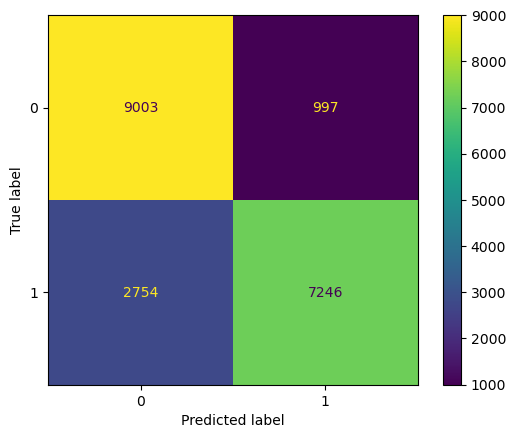

In [116]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## XGB Classifier 
## First Trial 

In [117]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
    XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss'
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [118]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [119]:
scores['train_f1'].mean()

0.8580778841396677

In [120]:
scores['test_f1'].mean()

0.8019033787266873

In [121]:
scores['train_precision'].mean()

0.9151853926082388

In [122]:
scores['test_precision'].mean()

0.8849786265870472

In [123]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [124]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [125]:
accuracy_score(y , y_pred)

0.81925

In [126]:
precision_score( y , y_pred)

0.8850560849113497

In [127]:
f1_score( y , y_pred)

0.8023618172871905

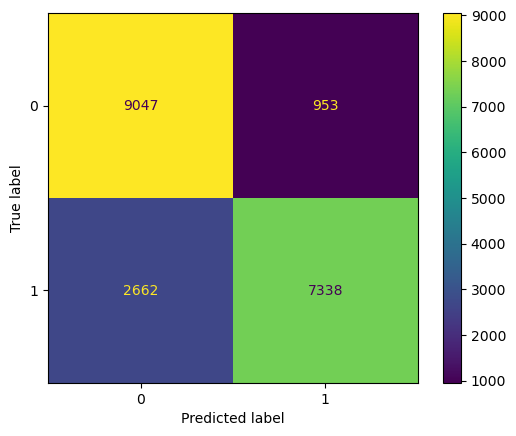

In [128]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [129]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
     XGBClassifier(
    n_estimators=100,           # Number of trees
    learning_rate=0.05,         # Learning rate
    max_depth=6,                # Depth of trees
    min_child_weight=1,         # Minimum sum of instance weights
    subsample=0.8,              # Fraction of samples for training
    colsample_bytree=0.8,       # Fraction of features to use for each tree
    gamma=0.1,                  # Minimum loss reduction                   
    alpha=0.1                   # L1 regularization
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [130]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [131]:
scores['train_f1'].mean()

0.8574573725397748

In [132]:
scores['test_f1'].mean()

0.7986264910970086

In [133]:
scores['train_precision'].mean()

0.9153821078497411

In [134]:
scores['test_precision'].mean()

0.884292330112066

In [135]:
pl.fit(x , y )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [136]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [137]:
accuracy_score( y , y_pred)

0.81675

In [138]:
precision_score( y , y_pred)

0.884358694333212

In [139]:
f1_score( y , y_pred)

0.7990789978619594

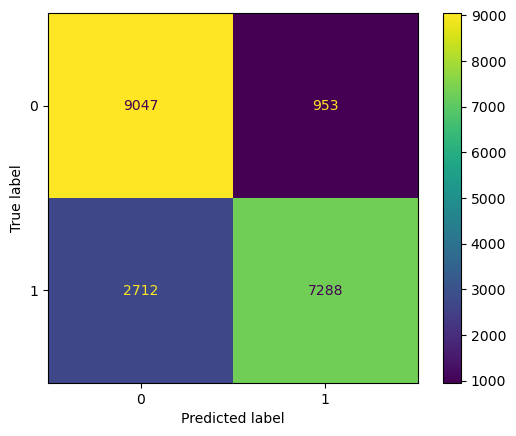

In [140]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial

In [141]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
     XGBClassifier(
    n_estimators=150,           # Increased the number of trees to improve performance
    learning_rate=0.01,         # Decreased the learning rate for slower but more stable learning
    max_depth=8,                # Increased tree depth to capture more complex patterns
    min_child_weight=5,         # Increased to make the model more conservative and reduce overfitting
    subsample=0.9,              # Slightly increased to use more data for training each tree
    colsample_bytree=0.9,       # Increased to use more features for each tree, increasing model diversity
    gamma=0.2,                  # Increased gamma to reduce unnecessary splits and overfitting
    scale_pos_weight=2,         # Increased to handle imbalanced classes better
    eval_metric='logloss'       # Logloss for evaluation
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [142]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [143]:
scores['train_f1'].mean()

0.8476793813931603

In [144]:
scores['test_f1'].mean()

0.7926155430576179

In [145]:
scores['train_precision'].mean()

0.7880872368202235

In [146]:
scores['test_precision'].mean()

0.7507752978509249

In [147]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [148]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [149]:
accuracy_score(y, y_pred)

0.78075

In [150]:
f1_score(y , y_pred)

0.7930139249468964

In [151]:
precision_score(y , y_pred)

0.7510058113544926

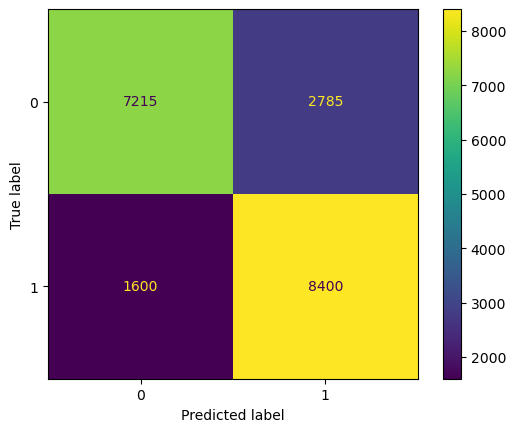

In [152]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [155]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
     XGBClassifier(
    n_estimators=150,           # Number of trees
    learning_rate=0.1,          # Increased learning rate for faster learning
    max_depth=8,                # Tree depth
    min_child_weight=5,         # Minimum sum of instance weights for a split
    subsample=0.9,              # Fraction of samples used for training
    colsample_bytree=0.9,       # Fraction of features used per tree
    gamma=0.2,                  # Minimum loss reduction for split
    scale_pos_weight=2,         # Scaling for imbalanced classes
    objective='binary:logistic', # Classification task
    eval_metric='logloss'       # Evaluation metric
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [156]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [157]:
scores['train_f1'].mean()

0.9447709591027088

In [158]:
scores['test_f1'].mean()

0.8085193566126545

In [159]:
scores['train_precision'].mean()

0.919934529650333

In [160]:
scores['test_precision'].mean()

0.8189350027010001

In [161]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [162]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [163]:
accuracy_score(y,y_pred)

0.81155

In [164]:
f1_score(y , y_pred)

0.8092707858914022

In [165]:
precision_score( y ,y_pred)

0.8191783628726564

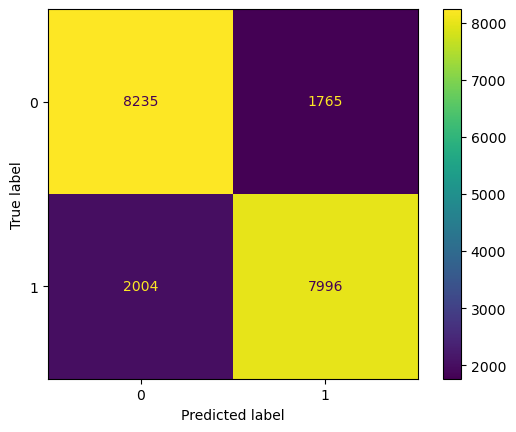

In [166]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Fifth Trial

In [167]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
     XGBClassifier(
    n_estimators=150,           # Number of trees
    learning_rate=0.2,          # Increased learning rate for faster learning
    max_depth=8,                # Tree depth
    min_child_weight=5,         # Minimum sum of instance weights for a split
    subsample=0.9,              # Fraction of samples used for training
    colsample_bytree=0.9,       # Fraction of features used per tree
    gamma=0.2,                  # Minimum loss reduction for split
    scale_pos_weight=2,         # Scaling for imbalanced classes
    objective='binary:logistic', # Classification task
    eval_metric='logloss'       # Evaluation metric
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [168]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [169]:
scores['train_f1'].mean()

0.9786662114778238

In [170]:
scores['test_f1'].mean()

0.8071284581900731

In [171]:
scores['train_precision'].mean()

0.9637106563198928

In [172]:
scores['test_precision'].mean()

0.8249991002590289

In [173]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [174]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [175]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [176]:
accuracy_score(y,y_pred)

0.8118

In [177]:
f1_score(y, y_pred)

0.8079395856720073

In [178]:
precision_score(y, y_pred)

0.8248593456970202

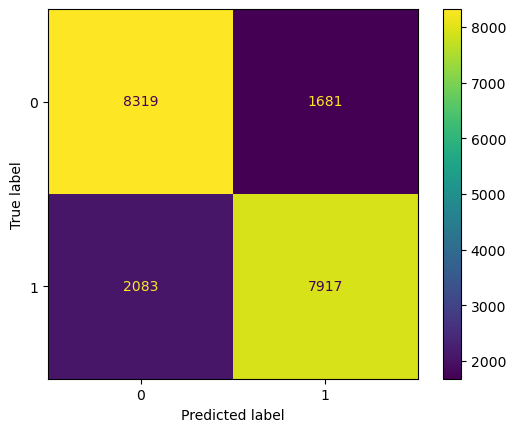

In [179]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Sixth Trial

In [180]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
     XGBClassifier(
    n_estimators=100,           # Number of trees
    learning_rate=0.2,          # Increased learning rate for faster learning
    max_depth=8,                # Tree depth
    min_child_weight=5,         # Minimum sum of instance weights for a split
    subsample=0.9,              # Fraction of samples used for training
    colsample_bytree=0.9,       # Fraction of features used per tree
    gamma=0.2,                  # Minimum loss reduction for split
    scale_pos_weight=2,         # Scaling for imbalanced classes
    objective='binary:logistic', # Classification task
    eval_metric='logloss'       # Evaluation metric
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [181]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [182]:
scores['train_f1'].mean()

0.958382645682255

In [183]:
scores['test_f1'].mean()

0.8068717236540441

In [184]:
scores['train_precision'].mean()

0.9370641092416749

In [185]:
scores['test_precision'].mean()

0.8177244857891474

In [186]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [187]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [188]:
accuracy_score(y,y_pred)

0.81

In [189]:
f1_score(y,y_pred)

0.8076728413807065

In [190]:
precision_score(y,y_pred)

0.8176880508300881

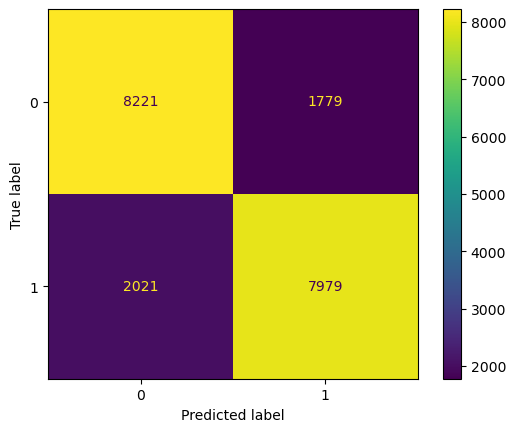

In [191]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Seventh Trial

In [192]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
     XGBClassifier(
    n_estimators=75,           # Number of trees
    learning_rate=0.2,          # Increased learning rate for faster learning
    max_depth=8,                # Tree depth
    min_child_weight=5,         # Minimum sum of instance weights for a split
    subsample=0.9,              # Fraction of samples used for training
    colsample_bytree=0.9,       # Fraction of features used per tree
    gamma=0.2,                  # Minimum loss reduction for split
    scale_pos_weight=2,         # Scaling for imbalanced classes
    objective='binary:logistic', # Classification task
    eval_metric='logloss'       # Evaluation metric
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [193]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [194]:
scores['train_f1'].mean()

0.942223807945215

In [195]:
scores['test_f1'].mean()

0.8062462576043045

In [196]:
scores['train_precision'].mean()

0.9177067680774407

In [197]:
scores['test_precision'].mean()

0.8154854027089948

In [198]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [199]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [200]:
accuracy_score(y, y_pred)

0.809

In [201]:
f1_score(y, y_pred)

0.8069927243330639

In [202]:
precision_score(y , y_pred)

0.8155637254901961

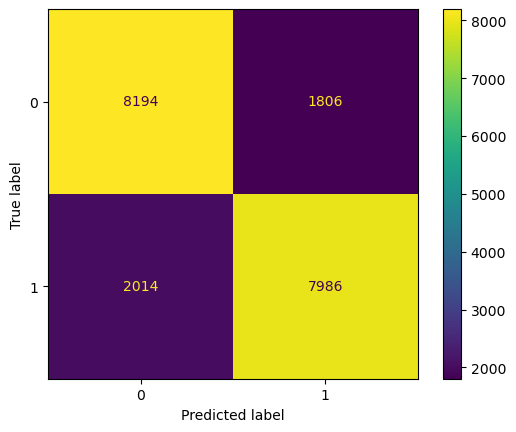

In [203]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Eighth Trial

In [204]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}


pl = make_pipeline(
    preprocessing,  
    StandardScaler(), 
    SMOTE(),
     XGBClassifier(
    n_estimators=75,           # Number of trees
    learning_rate=0.2,          # Increased learning rate for faster learning
    max_depth=3,                # Tree depth
    min_child_weight=5,         # Minimum sum of instance weights for a split
    subsample=0.9,              # Fraction of samples used for training
    colsample_bytree=0.7,       # Fraction of features used per tree
    gamma=0.2,                  # Minimum loss reduction for split
    scale_pos_weight=2,         # Scaling for imbalanced classes
    objective='binary:logistic', # Classification task
    eval_metric='logloss'       # Evaluation metric
)

)

# Cross-validation
scores = cross_validate(
    estimator=pl, 
    X=x, 
    y=y, 
    cv=StratifiedKFold(n_splits=5), 
    scoring=scoring, 
    return_train_score=True
)

In [205]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [206]:
scores['train_f1'].mean()

0.8412714008331074

In [207]:
scores['test_f1'].mean()

0.7929449260368299

In [208]:
scores['train_precision'].mean()

0.8002934055763815

In [209]:
scores['test_precision'].mean()

0.776132895951977

In [210]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [211]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [212]:
accuracy_score(y, y_pred)

0.7888

In [213]:
f1_score(y, y_pred)

0.793386812756799

In [214]:
precision_score(y , y_pred)

0.7765224052087323

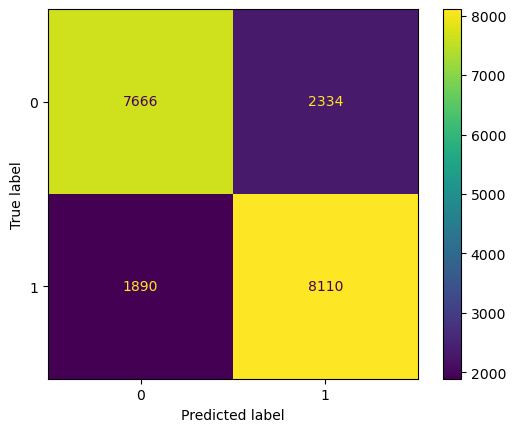

In [215]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Decision Tree 
# First Trial

In [217]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with DecisionTreeClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    SMOTE(),
    DecisionTreeClassifier(
        criterion='gini',       # Criterion for splitting ('gini', 'entropy', or 'log_loss')
        splitter='best',        # Strategy to choose the split at each node ('best' or 'random')
        max_depth=5,            # Maximum depth of the tree (adjust as needed)
        min_samples_split=10,   # Minimum number of samples required to split an internal node
        min_samples_leaf=5,     # Minimum number of samples required to be at a leaf node
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [218]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [219]:
scores['train_f1'].mean()

0.7998510242545025

In [220]:
scores['test_f1'].mean()

0.795908985875128

In [221]:
scores['train_precision'].mean()

0.9026763966858067

In [222]:
scores['test_precision'].mean()

0.8969666275228363

In [223]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [471]:
from sklearn.model_selection import cross_val_predict

In [224]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [225]:
accuracy_score(y,y_pred)

0.81655

In [226]:
f1_score(y, y_pred)

0.7959285833472385

In [227]:
precision_score(y, y_pred)

0.8967289133976689

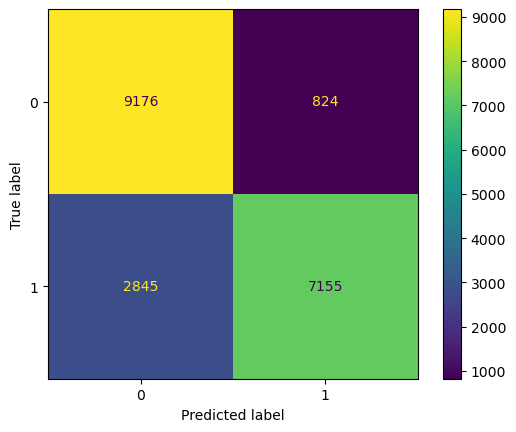

In [228]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [231]:
from sklearn.feature_selection import SelectKBest, f_classif
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with DecisionTreeClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    SMOTE(),
    SelectKBest(score_func=f_classif, k=5),
    DecisionTreeClassifier(
        criterion='entropy',       # Criterion for splitting ('gini', 'entropy', or 'log_loss')
        splitter='best',        # Strategy to choose the split at each node ('best' or 'random')
        max_depth=10,            # Maximum depth of the tree (adjust as needed)
        min_samples_split=20,   # Minimum number of samples required to split an internal node
        min_samples_leaf=10,     # Minimum number of samples required to be at a leaf node
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [232]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectkbest', SelectKBest(k=5)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [233]:
scores['train_f1'].mean()

0.8370487051892905

In [234]:
scores['test_f1'].mean()

0.8006060941679802

In [235]:
scores['train_precision'].mean()

0.8882108177793004

In [236]:
scores['test_precision'].mean()

0.8589998713578689

In [237]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectkbest', SelectKBest(k=5)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [238]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [239]:
accuracy_score( y ,y_pred)

0.81335

In [240]:
precision_score( y , y_pred)

0.8588114050154586

In [241]:
f1_score( y , y_pred)

0.8007259915656862

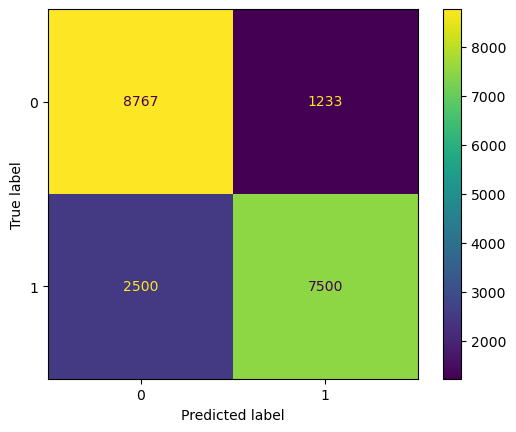

In [242]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Third Trial

In [243]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with DecisionTreeClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    SMOTE(),
    SelectKBest(score_func=f_classif, k=5),
    DecisionTreeClassifier(
        criterion='gini',       # Criterion for splitting ('gini', 'entropy', or 'log_loss')
        splitter='random',        # Strategy to choose the split at each node ('best' or 'random')
        max_depth=15,            # Maximum depth of the tree (adjust as needed)
        min_samples_split=5,   # Minimum number of samples required to split an internal node
        min_samples_leaf=3,     # Minimum number of samples required to be at a leaf node
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [244]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectkbest', SelectKBest(k=5)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=5, random_state=42,
                                        splitter='random'))])

In [245]:
scores['train_f1'].mean()

0.8345618144183347

In [246]:
scores['test_f1'].mean()

0.7832362421004095

In [247]:
scores['train_precision'].mean()

0.8969922625319897

In [248]:
scores['test_precision'].mean()

0.8500465146615219

In [249]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('selectkbest', SelectKBest(k=5)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=3,
                                        min_samples_split=5, random_state=42,
                                        splitter='random'))])

In [250]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [251]:
accuracy_score( y , y_pred)

0.79915

In [252]:
precision_score(y , y_pred)

0.8500877706260971

In [253]:
f1_score( y , y_pred)

0.7833917497977891

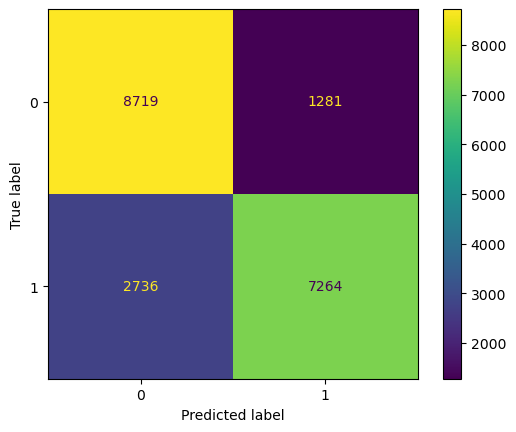

In [254]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Forth Trial

In [255]:
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with DecisionTreeClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    SMOTE(),
    DecisionTreeClassifier(
        criterion='entropy',       # Criterion for splitting ('gini', 'entropy', or 'log_loss')
        splitter='random',        # Strategy to choose the split at each node ('best' or 'random')
        max_depth=None,            # Maximum depth of the tree (adjust as needed)
        min_samples_split=2,   # Minimum number of samples required to split an internal node
        min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [256]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42,
                                        splitter='random'))])

In [257]:
scores['train_f1'].mean()

1.0

In [258]:
scores['test_f1'].mean()

0.7390628500931482

In [259]:
scores['train_precision'].mean()

1.0

In [260]:
scores['test_precision'].mean()

0.7525257074439408

In [261]:
pl.fit(x , y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42,
                                        splitter='random'))])

In [262]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [263]:
accuracy_score( y , y_pred)

0.7439

In [264]:
precision_score( y , y_pred)

0.7525367570925657

In [265]:
f1_score( y , y_pred)

0.7394445009665276

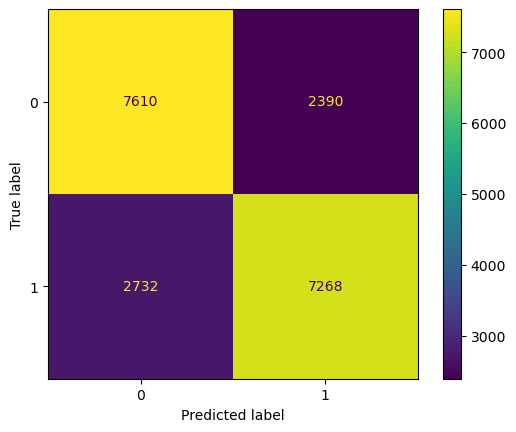

In [266]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## GradientBoosting
## First Trial

In [267]:
from sklearn.ensemble import GradientBoostingClassifier

In [268]:
# Define scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with GradientBoostingClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    SMOTE(),
    GradientBoostingClassifier(
        n_estimators=100,       # Number of boosting stages
        learning_rate=0.1,      # Shrinks the contribution of each tree
        max_depth=3,            # Maximum depth of each tree
        min_samples_split=10,   # Minimum samples to split an internal node
        min_samples_leaf=5,     # Minimum samples at a leaf node
        subsample=0.9,          # Fraction of samples used for training
        max_features='sqrt',    # Number of features considered for splits
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)


In [269]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features='sqrt',
                                            min_samples_leaf=5,
                                            min_samples_split=10,
                                            random_state=42, subsample=0.9))])

In [270]:
scores['train_f1'].mean()

0.8286914345914915

In [271]:
scores['test_f1'].mean()

0.7871788815554398

In [272]:
scores['train_precision'].mean()

0.8675807129732644

In [273]:
scores['test_precision'].mean()

0.8521711007768694

In [274]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features='sqrt',
                                            min_samples_leaf=5,
                                            min_samples_split=10,
                                            random_state=42, subsample=0.9))])

In [275]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [276]:
accuracy_score(y,y_pred)

0.8026

In [277]:
f1_score(y , y_pred)

0.7876049063912202

In [278]:
precision_score(y , y_pred)

0.8523521192361434

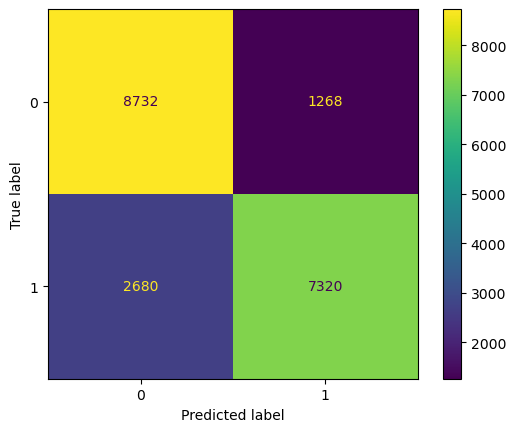

In [279]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [280]:
# Define scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with updated GradientBoostingClassifier
pl = make_pipeline(
    preprocessing,  
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=150,       # Number of boosting stages
        learning_rate=0.15,     # Adjusted learning rate
        max_depth=6,            # Maximum depth of trees
        min_samples_split=15,   # Minimum samples to split an internal node
        min_samples_leaf=10,    # Minimum samples at a leaf node
        subsample=0.85,         # Fraction of samples used for training
        max_features=0.75,      # Fraction of features considered for splits
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [281]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=6,
                                            max_features=0.75,
                                            min_samples_leaf=10,
                                            min_samples_split=15,
                                            n_estimators=150, random_state=42,
                                            subsample=0.85))])

In [282]:
scores['train_f1'].mean()

0.9416000347048599

In [283]:
scores['test_f1'].mean()

0.8089572407811108

In [284]:
scores['train_precision'].mean()

0.9645736663594994

In [285]:
scores['test_precision'].mean()

0.8752224372709805

In [286]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=6,
                                            max_features=0.75,
                                            min_samples_leaf=10,
                                            min_samples_split=15,
                                            n_estimators=150, random_state=42,
                                            subsample=0.85))])

In [61]:
from sklearn.model_selection import cross_val_predict

In [287]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [288]:
accuracy_score(y,y_pred)

0.82295

In [289]:
f1_score(y , y_pred)

0.8096748185971513

In [290]:
precision_score(y , y_pred)

0.8753050552004649

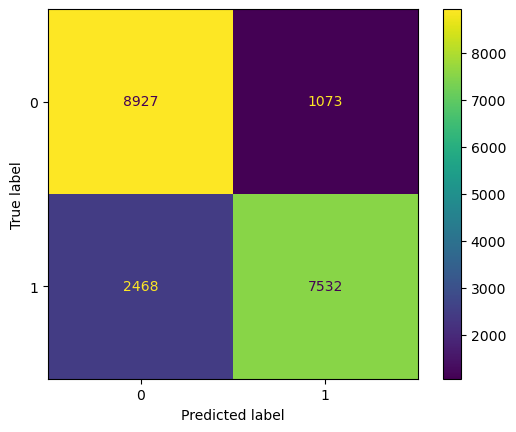

In [291]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Adaboost Classifier
## First Trial

In [292]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
# Define scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with AdaBoostClassifier
pl = make_pipeline(
    preprocessing,  # Ensure 'preprocessing' is defined elsewhere
    StandardScaler(),
    SMOTE(),
    AdaBoostClassifier(
        n_estimators=150,       # Number of boosting stages
        learning_rate=0.15,     # Adjusted learning rate
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [293]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.15, n_estimators=150,
                                    random_state=42))])

In [294]:
scores['train_f1'].mean()

0.80612987388447

In [295]:
scores['test_f1'].mean()

0.7733815506287252

In [296]:
scores['train_precision'].mean()

0.8318653042980682

In [297]:
scores['test_precision'].mean()

0.8203838374482408

In [298]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.15, n_estimators=150,
                                    random_state=42))])

In [299]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [301]:
accuracy_score(y,y_pred)

0.7861

In [302]:
f1_score(y , y_pred)

0.7739378566899175

In [303]:
precision_score(y , y_pred)

0.8205961452263559

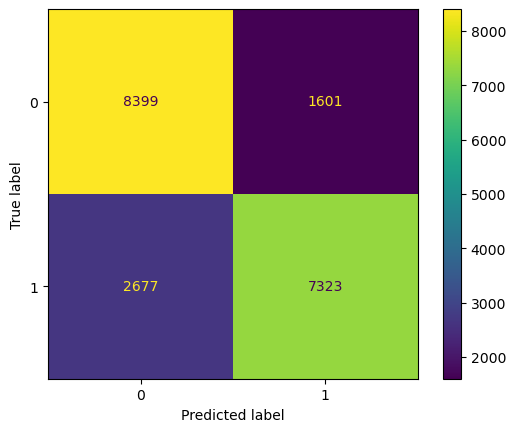

In [304]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

## Second Trial

In [305]:
# Define scoring metrics
scoring = {
    'f1': 'f1',
    'precision': 'precision'
}

# Pipeline with AdaBoostClassifier and hyperparameter adjustments
pl = make_pipeline(
    preprocessing,  # Ensure 'preprocessing' is defined elsewhere
    StandardScaler(),
    SMOTE(),
    AdaBoostClassifier(
        
        n_estimators=200,       # Increase the number of boosting stages
        learning_rate=0.2,      # Lower learning rate for better generalization
        random_state=42         # Ensures reproducibility
    )
)

# Cross-validation
scores = cross_validate(
    estimator=pl,
    X=x,
    y=y,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,
    return_train_score=True
)

In [306]:
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=200,
                                    random_state=42))])

In [307]:
scores['train_f1'].mean()

0.8087179140581628

In [308]:
scores['test_f1'].mean()

0.7714286348503443

In [309]:
scores['train_precision'].mean()

0.8331033502995282

In [310]:
scores['test_precision'].mean()

0.8197537264333746

In [312]:
pl.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['person_gender']),
                                                                                  ('cat_be_pl',
                                                                                   Pipeline(steps=[('binaryencoder',
                                                                                                    BinaryEncoder())]...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_log',
                                                                                   Pipeline(steps=[('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                                   ['person_income',
                                                                                    'loan_amnt'])]),
                                                  ['person_income',
                                                   'loan_amnt'])])),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=200,
                                    random_state=42))])

In [314]:
y_pred = cross_val_predict(pl , x, y, cv = StratifiedKFold(n_splits=5))

In [315]:
accuracy_score(y , y_pred)

0.7847

In [316]:
f1_score(y , y_pred)

0.7720969619985181

In [317]:
precision_score(y , y_pred)

0.8201034405217

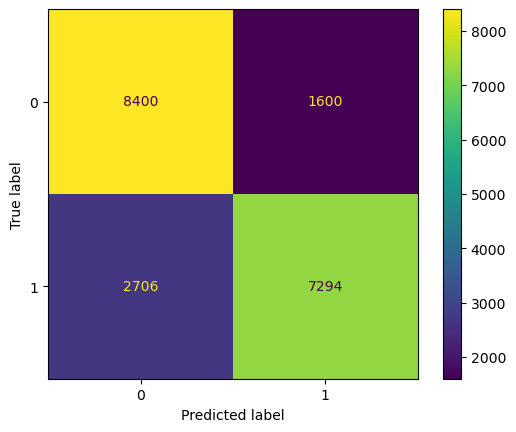

In [318]:
ConfusionMatrixDisplay(confusion_matrix(y , y_pred)).plot()

In [44]:
import joblib

In [45]:
joblib.dump(model , "model.h5")

['model.h5']

In [46]:
x.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')